**Brief Introduction**

In this project, my main aim is to show ways to go deep into the data story-telling even though the dataset is small. Also, I will work on a model that could give us an approximation as to what will be the charges of the patients. Nevertheless, we must go deeply into what factors influenced the charge of a specific patient. In order to do this we must look for patterns in our data analysis and gain extensive insight of what the data is telling us. Lastly, we will go step by step to understand the story behind the patients in this dataset only through this way we could have a better understanding of what features will help our model have a closer accuracy to the true patient charge.

**Objective – Explore the dataset and extract insights from the data. Using statistical evidence to**
- Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? 
- Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
- Is the proportion of smokers significantly different across different regions? 
- Is the mean BMI of women with no children, one child, and two children the same?<br>

<br>

# Context
Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. 

# Data Set 
- Age :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- Sex :- This is the policy holder's gender, either male or female.
- BMI :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
- Children :- This is an integer indicating the number of children / dependents covered by the insurance plan.
- Smoker :- This is yes or no depending on whether the insured regularly smokes tobacco.
- Region :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
- Charges​ :- Individual medical costs billed to health insurance

# Question to be answered
- Are there more Male beneficary ?
- Are there more smoker ?
- Which region has maximum , medical cost billed to health insurance.?
- What is age of beneficary.?
- Do beneficary having more dependents had more medical cost billed.?
- 

# Libraries


In [1]:
### IMPORT: ------------------------------------
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from   scipy.stats import chi2_contingency   # For Chi-Sq 


# Read and Understand Data

In [2]:
#Reading the csv file AxisInsurance.csv 
data_path='../input/insurance/insurance.csv'
df=pd.read_csv(data_path)
insured=df.copy()

In [3]:
# inspect data, print top 5 
insured.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# bottom 5 rows:
insured.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
#get the size of dataframe
print ("Rows     : " , insured.shape[0])
print ("Columns  : " , insured.shape[1])
print ("\nFeatures : \n", insured.columns.tolist())
print ("\nMissing values :  ", insured.isnull().sum().values.sum())
print ("\nUnique values :  \n", insured.nunique())

Rows     :  1338
Columns  :  7

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Missing values :   0

Unique values :  
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [6]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Types of variables**

- Categorical varibles - sex,smoker,region,children
-  Quantitative variables -age,bmi,charges. Here children is a discrete variable where as age, bmi, and charges are continous variables.

- There are no missing values

In [7]:
#changing object dtype to category  to save memory
insured.sex=insured['sex'].astype("category")
insured.smoker=insured['smoker'].astype("category")
insured.region=insured['region'].astype("category")

insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [8]:
insured.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Observations**
 - Average age of the primary beneficiary is 39.2 and maximum age is 64.
 - Average BMI is 30.66, that is out of normal BMI range, Maximum BMI is 53.13
 - Average medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770
 - Median is less than mean in charges , indicating distrubution is postively skewed .
 - Customer on an average has 1 child.
 - For Age, BMI, children , mean is almost equal to median , suggesting data is normally distrubuted 
 
    

In [9]:
#Are there more Male beneficary ?
# Are there more smoker ?
# which region has maximum , claims .?

insured.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
# get counts of unique observations for each category variable
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())


male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


**Observations**
 - 676 male and 662 female, indicated sample has  slightly more males than females. 
 - 1064 nonsomker and 274 smoker, indicating sample has more nonsmokers.
 - Number of  claims from customer who reside in southwest region is more compared to other regions


# Exploratory Data Analysis

## Univariate Analysis

In [11]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
   

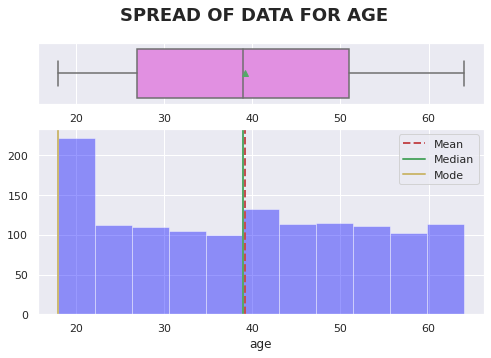

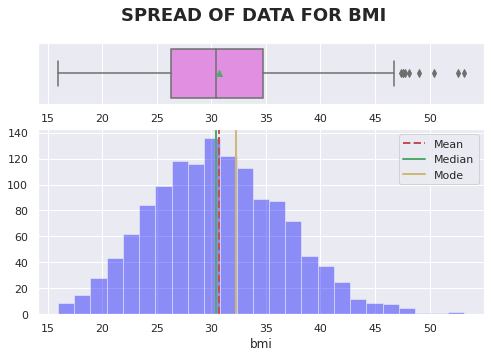

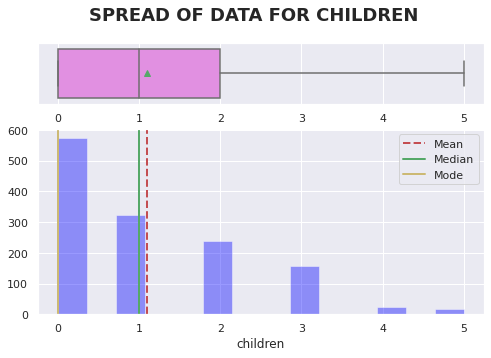

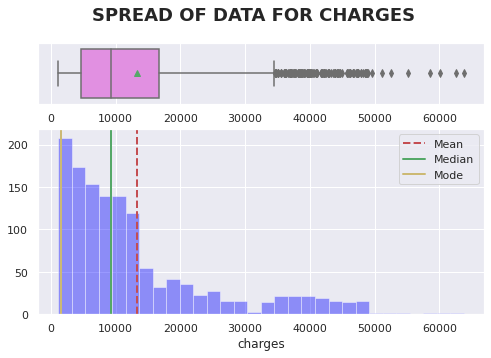

In [12]:
#select all quantitative columns for checking the spread
list_col=  insured.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(insured[list_col[i]])
    

**Observations**
- Age of primary beneficary lies approximately between 20 - 65 . Average Age is aprrox. 40. Majority of customer are in range 18- 20's.
- Bmi is normally distrubuted and Average BMI of beneficiary is 30.This BMI is outside the normal range of BMI. There are lot of outliers at upper end
- Most of the beneficary have no childrens.
- Charges distrubution is unimodal and is right skewed .Average cost incured to the insurance is appro. 130000 and highest charge is 63770.There are lot of outliers at upper end.

In [13]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage
    

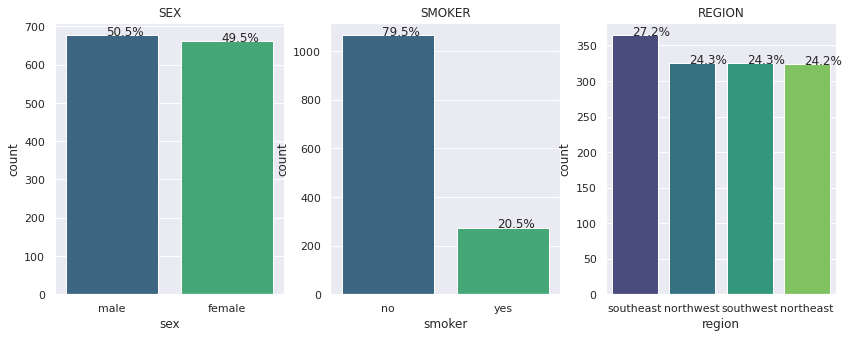

In [14]:
#get all category datatype 
list_col=  insured.select_dtypes(['category']).columns
fig1, axes1 =plt.subplots(1,3,figsize=(14, 5))
for i in range(len(list_col)):
    order = insured[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=list_col[i], data=insured , order=order,ax=axes1[i],palette='viridis').set(title=list_col[i].upper())
    bar_perc(axes1[i],insured[list_col[i]])

**Observations**
 - 50.5% of beneficiary are male and 49.5 % are female. Approximately same number of male and female beneficiary.
 - 20.5% of beneficary are smokers.
 - Beneficary are evenly distributed across regions with South East being the most populous one (~27%) with the rest of regions each containing around ~24% 
 - Most of the beneficiary don't have kid.

## Bivariate & Multivariate Analysis

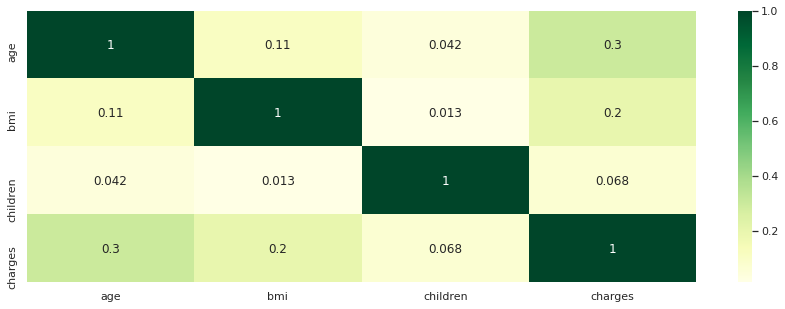

In [15]:
plt.figure(figsize=(15,5))
sns.heatmap(insured.corr(),annot=True ,cmap="YlGn" )
plt.show()

In [16]:
cat_columns=insured.select_dtypes(['category']).columns
cat_columns

Index(['sex', 'smoker', 'region'], dtype='object')

**Observation**
 - There is  very little significant correlation between charges &age and charges and bmi.


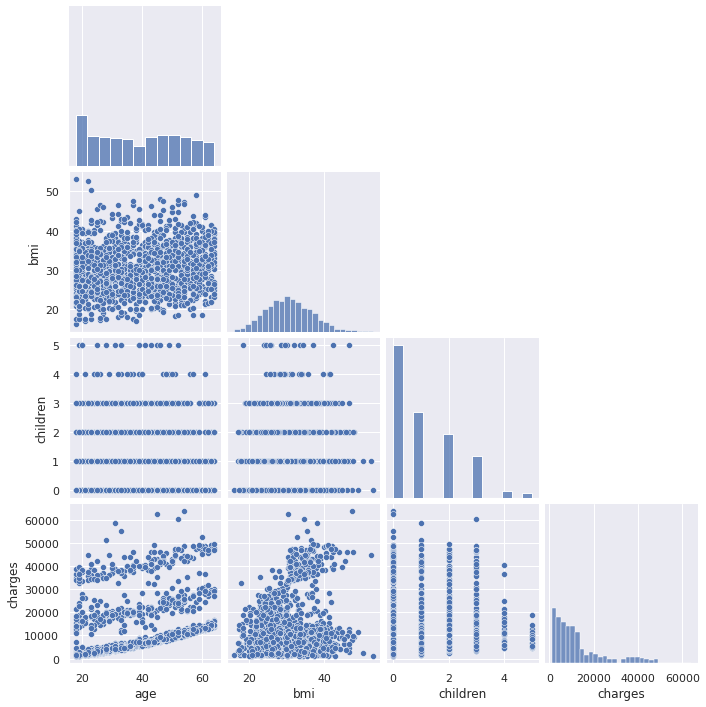

In [17]:
sns.pairplot(data=insured , corner=True)
plt.show()

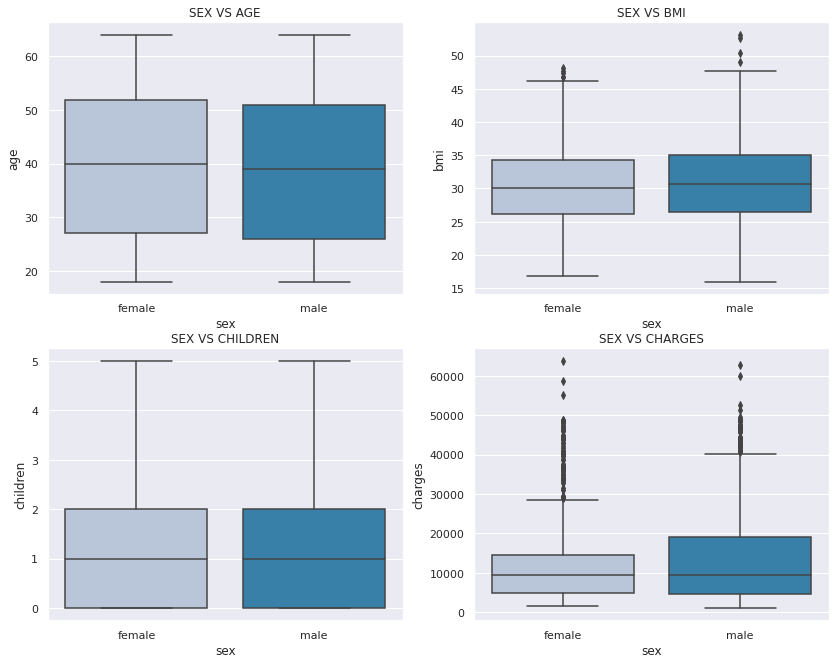

In [18]:
#Sex vs all numerical variable
fig1, axes1 =plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the spread
list_col=  insured.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=insured[list_col[i]],x=insured['sex'],ax=ax,palette="PuBu", orient='v').set(title='SEX VS '+ list_col[i].upper())
    
    

**Observation**
 - Avergae Age of female beneficiary is slightly higher than male beneficiary
 - No of children both male and female beneficary have is same
 - BMI of Male policy holder has many outliers and Average BMI of male is slightly higher than female
 - Male policy holder has incure more charges to insurance compared to female policy holder. There are lot of outliers in female policy holder

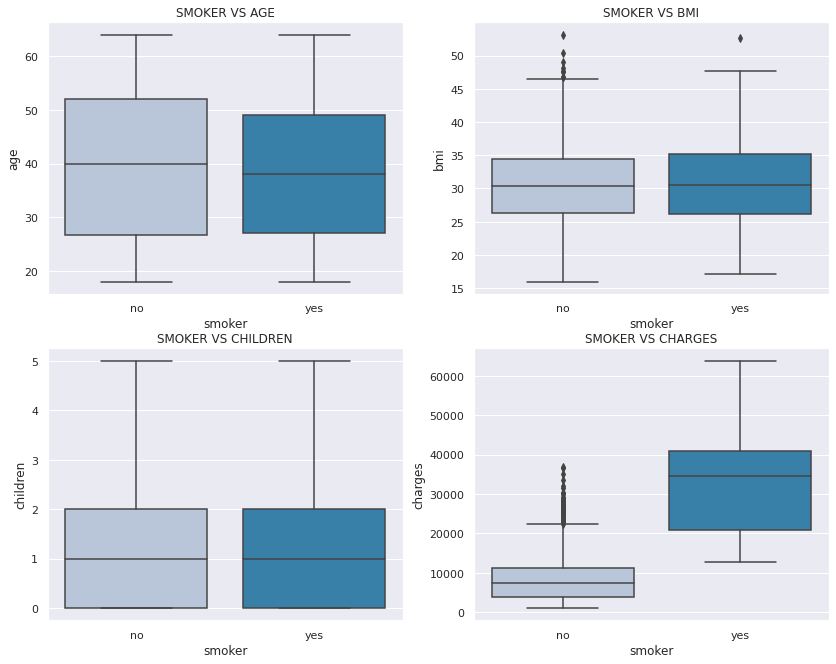

In [19]:
#smoker vs all numerical variables
fig1, axes1 =plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the spread
list_col=  insured.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=insured[list_col[i]],x=insured['smoker'],ax=ax,palette="PuBu",orient='v').set(title='SMOKER VS '+ list_col[i].upper()  )
    

**Observation**
- Smoker have incured more cost to insurance than nonsmoker. There are outliers in nonsmoker , need to analyze.
- BMI of non smoker has lot of outliers.

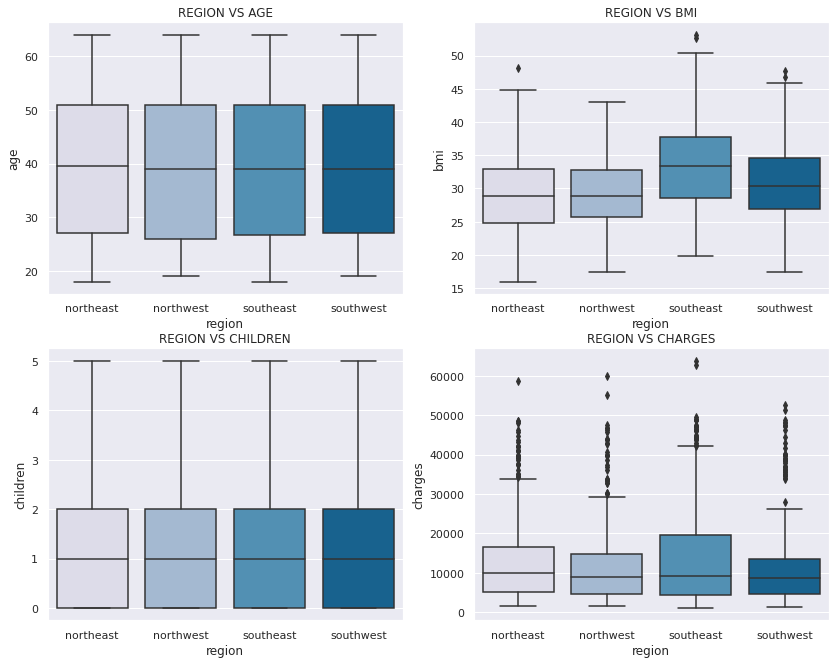

In [20]:
#region vs all numerical variable
fig1, axes1 =plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the outliers
list_col=  insured.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=insured[list_col[i]],x=insured['region'],ax=ax,palette="PuBu",orient='v').set(title='REGION VS '+ list_col[i].upper()  )
    

**Observations**
 - Age  and numnber of children across regions is almost same.
 - Average Bmi of policy holder from southeast higher compared to other regions
 - Charges incured because of policy holder from southeast is higher compared to othe regions
 - There are lot of outliers on upper end in charges


[Text(0.5, 1.0, 'Smoker vs Sex')]

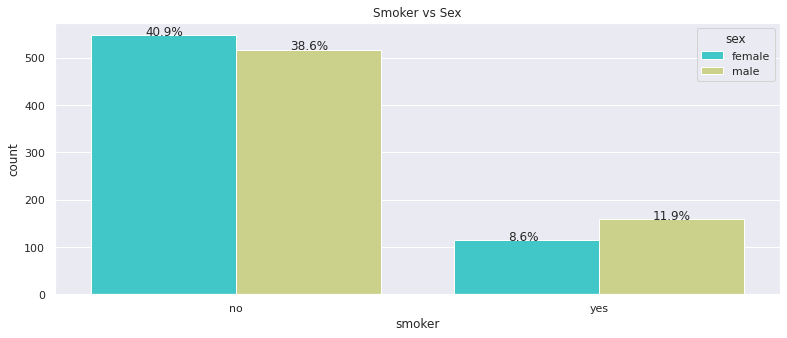

In [21]:
#smoker vs Sex
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoker',hue='sex',data=insured,palette='rainbow')
bar_perc(ax,insured['sex'])
ax.set(title="Smoker vs Sex")

[Text(0.5, 1.0, 'Smoker vs Charges')]

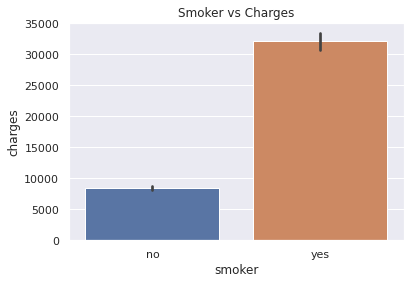

In [22]:
#smoker vs charges
sns.barplot(x=insured.smoker,y=insured.charges).set(title="Smoker vs Charges")

[Text(0.5, 1.0, 'Smoker vs Region')]

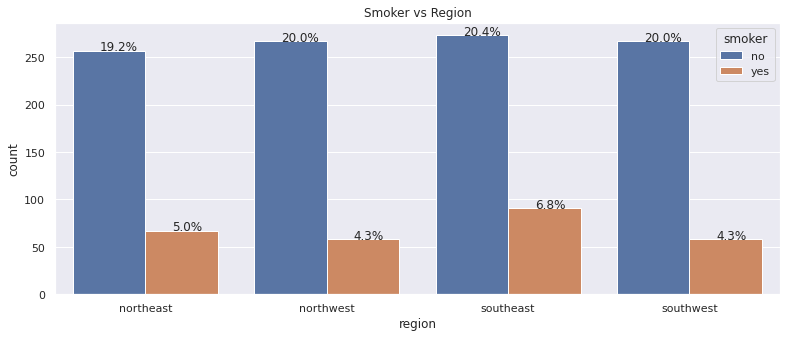

In [23]:
#region vs smoker
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='smoker',data=insured)
bar_perc(ax,insured['smoker'])
ax.set(title="Smoker vs Region")

**Observation**
- There are more male smokers than female.
- Southeast region has more smokers
- Smoker have more costlier claims than nonsmoker.

[Text(0.5, 1.0, 'Sex vs Region')]

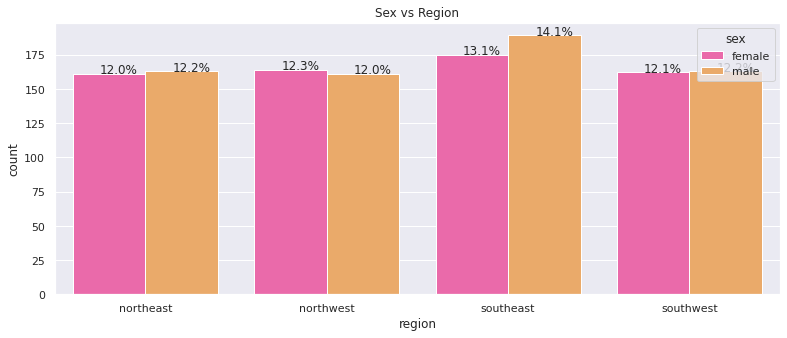

In [24]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='sex',data=insured,palette='spring')
bar_perc(ax,insured['sex'])
ax.set(title="Sex vs Region")

**Observations**
 - There are more smokers in southeast region compared to other regions.

In [25]:
insured.groupby(insured.sex).charges.mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

[Text(0.5, 1.0, 'Children vs Charges')]

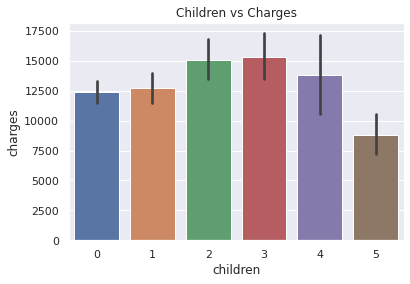

In [26]:
sns.barplot(x=insured.children,y=insured.charges).set(title="Children vs Charges")

[Text(0.5, 1.0, 'Sex Vs Charges')]

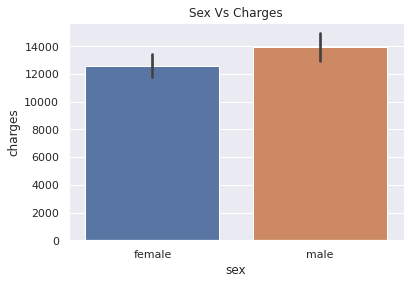

In [27]:
sns.barplot(x=insured.sex,y=insured.charges).set(title='Sex Vs Charges')

[Text(0.5, 1.0, 'Region Vs Charges')]

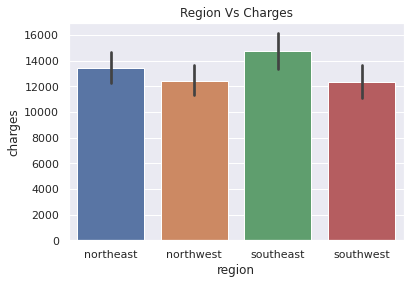

In [28]:
sns.barplot(x='region',y='charges',data=insured).set(title='Region Vs Charges')

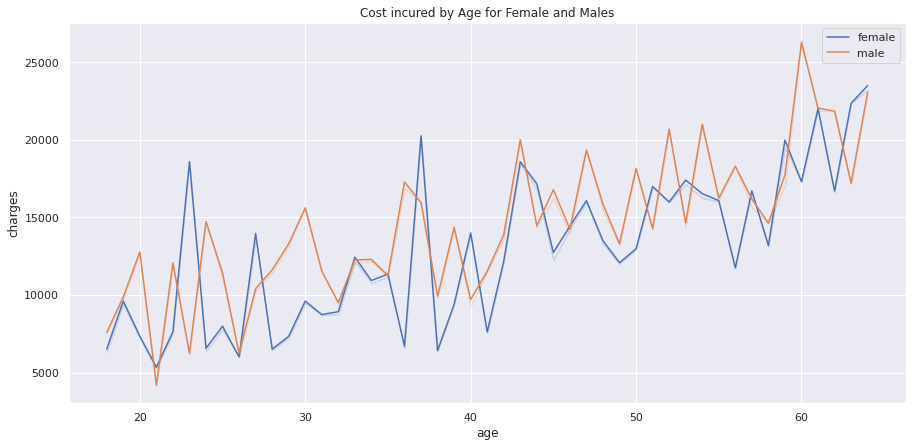

In [29]:
plt.figure(figsize=(15,7))
sns.lineplot(insured["age"],insured["charges"],hue=insured["sex"],ci=0).set(title= 'Cost incured by Age for Female and Males')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

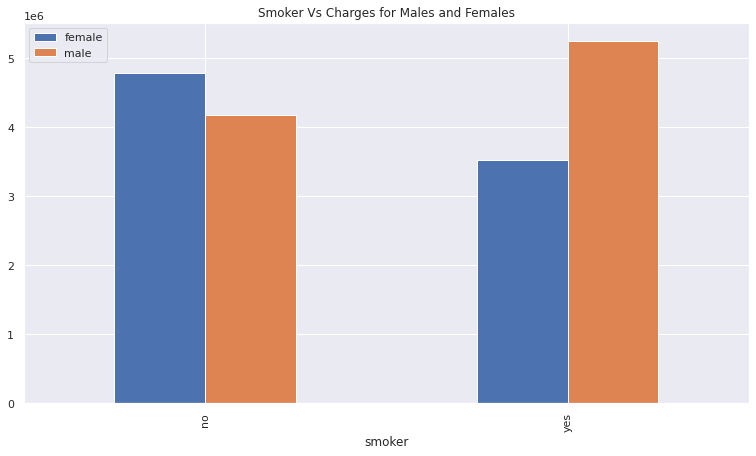

In [30]:
df_smoker_char_sex=pd.crosstab(index=insured.smoker,columns=insured.sex , values=insured.charges,aggfunc='sum')
fig1, axes1=plt.subplots(1,1,figsize=(13, 7))
df_smoker_char_sex.plot(kind='bar',ax=axes1,title="Smoker Vs Charges for Males and Females")
plt.legend(loc='upper left')
plt.show()

**Observations**
 - Charges incurred for males are more than charges incured for females
 - With increasing age of policy holder charges incured are going high for both male and female.
 - There some spikes for female at an approximate ages of 23,28,43.
 - Most claims are from southeast regions.
 - Males who smoke have most claims and have higher bills 
 - Number of claims made by female who dont smoke is more compared to female who smoke.
 
 


In [31]:
#creating groups of bmi
category=pd.cut(insured.bmi,bins=[15,25,35,45,55],labels=['15-25','25-35','35-45','45-55'])
insured.insert(5,'BMIGroup',category)

In [32]:
insured.head()

,age,sex,bmi,children,smoker,BMIGroup,region,charges
0,19,female,27.900,0,yes,25-35,southwest,16884.92400
1,18,male,33.770,1,no,25-35,southeast,1725.55230
2,28,male,33.000,3,no,25-35,southeast,4449.46200
3,33,male,22.705,0,no,15-25,northwest,21984.47061
4,32,male,28.880,0,no,25-35,northwest,3866.85520


In [33]:
#no of children has no relation with charges
insured.groupby(insured.children).charges.mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [34]:
insured.groupby(insured.BMIGroup).charges.mean()

BMIGroup
15-25    10284.290025
25-35    12720.254311
35-45    16913.681515
45-55    17547.926750
Name: charges, dtype: float64

In [35]:
category1=pd.cut(insured.age,bins=[18,28,38,48,58,68],labels=['18-28','28-38','38-48','48-58','58-68'])
insured.insert(6,'AgeBin',category1)

In [36]:
insured.groupby(insured.AgeBin).charges.mean()

AgeBin
18-28     9528.142786
28-38    11598.554943
38-48    14334.585843
48-58    15887.954341
58-68    20824.972901
Name: charges, dtype: float64

In [37]:
insured.groupby(['region','sex','smoker']).mean()['charges'].unstack()

smoker                     no           yes
region    sex                              
northeast female  9640.426984  28032.046398
          male    8664.042222  30926.252583
northwest female  8786.998679  29670.824946
          male    8320.689321  30713.181419
southeast female  8440.205552  33034.820716
          male    7609.003587  36029.839367
southwest female  8234.091260  31687.988430
          male    7778.905534  32598.862854

[Text(0.5, 1.0, 'Age Vs Charges')]

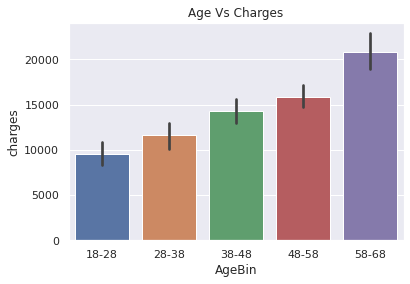

In [38]:
sns.barplot(x=insured.AgeBin,y=insured.charges).set(title='Age Vs Charges')

<AxesSubplot:xlabel='BMIGroup', ylabel='charges'>

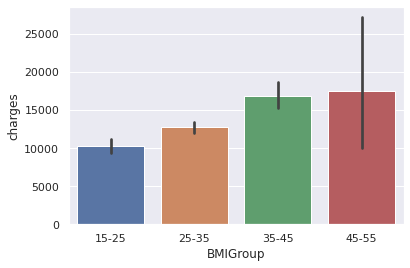

In [39]:
sns.barplot(x=insured.BMIGroup,y=insured.charges)

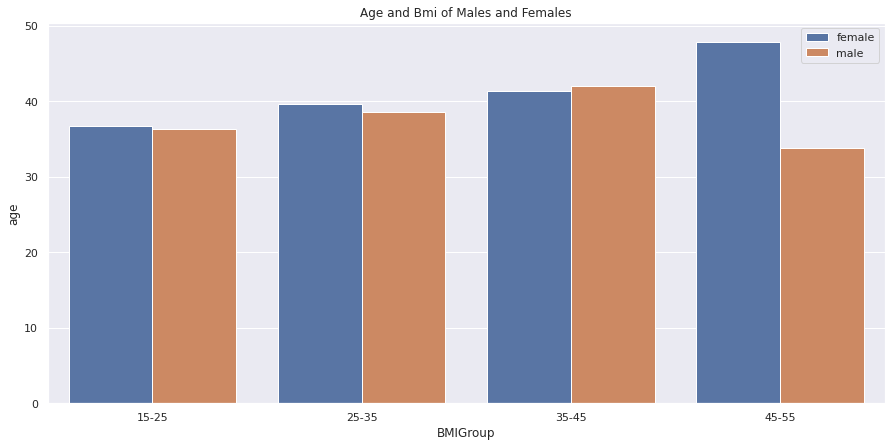

In [40]:
plt.figure(figsize=(15,7))
sns.barplot(x=insured["BMIGroup"],y=insured["age"],hue=insured['sex'],ci=0).set(title= 'Age and Bmi of Males and Females')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

[Text(0.5, 1.0, 'Fig 2:BMI group and Charges ')]

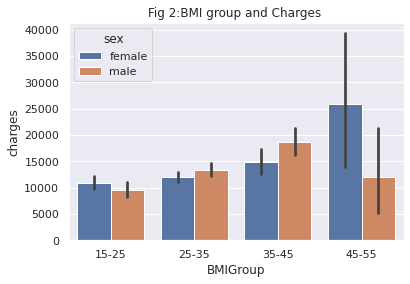

In [41]:
sns.barplot(x='BMIGroup',y='charges',hue='sex',data=insured).set(title="Fig 2:BMI group and Charges " )

**Observations**
- FeMales with most BMI has incured most charges to the insurance company
- BMI for male and females are not same
- Beneficary with higher BMI have incurred more cost to insurance.

In [42]:
pd.crosstab(insured['sex'],insured['children'])

children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,285,166,121,80,14,10


<Figure size 1800x720 with 0 Axes>

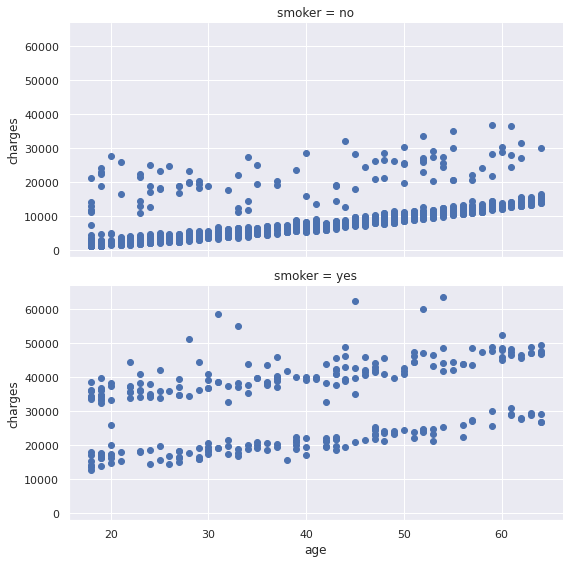

In [43]:
plt.figure(figsize=(25,10))
g=sns.FacetGrid(insured,row='smoker',height=4, aspect=2)
g=(g.map(plt.scatter ,'age','charges').add_legend())

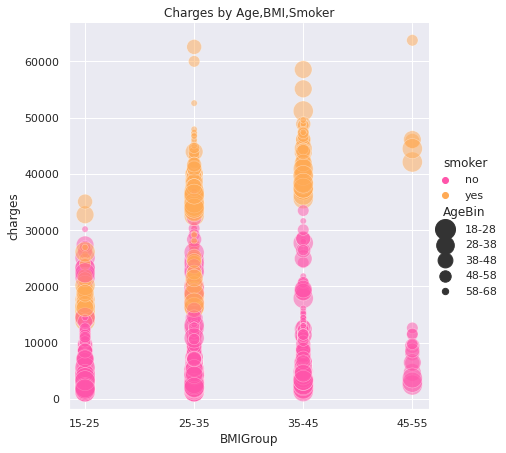

In [44]:
sns.relplot(x=insured.BMIGroup, y=insured.charges, hue=insured.smoker, size= insured.AgeBin,
            sizes=(40, 400), alpha=.5, palette="spring",
            height=6, data=insured).set(title='Charges by Age,BMI,Smoker');

**Observation**
- Males who smoker have incured more cost compared to nonsmokers.
- As age increased claims increased
-Smoker have higher medical claims

# Conclusion based on EDA
- As expected , as the age of the beneficiary  increases ,the cost to insurance increases.
- Males who smoke have most claims and have higher bills.
- Female who are nonsmoker also have more claims to nonsmoker males this may be because of child birth , need to explore claims type to understand better.
- Beneficiary with 2 or 3 dependent  have billed higher compared to others people who have 5.This is unusual and may be because of  uneven number of observations in each group. For example, no dependents group has 574 observations whereas five dependents group only has 18.
- Customer with bmi  >30 are  on higher side of obesity, have more health issues and have higher claims.
- Females with BMI more than 45 have billed higher to insurance.
- Age, BMI and Smoking are important attributes which can cost insurance company more.


# Statistical Analysis

# 1.Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

<div class ="alert alert-block alert-info">
    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  :  \mu_1 <= \mu_2  $ The average charges of smokers is less than or equal to nonsmokers 
 <br>
 

$\ H_a  :\mu_1 > \mu_2 $ The average charges of smokers is greater than nonsmokers  <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify the test</b></font>

Standard deviation of the population is not known  ,will perform a T stat test .  The > sign in alternate hypothesis indicate  test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of  sampling  distribution curve.

    


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [45]:
smoker=insured.loc[insured.smoker=="yes"]
smoker.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
0,19,female,27.90,0,yes,25-35,18-28,southwest,16884.9240
11,62,female,26.29,0,yes,25-35,58-68,southeast,27808.7251
14,27,male,42.13,0,yes,35-45,18-28,southeast,39611.7577
19,30,male,35.30,0,yes,35-45,28-38,southwest,36837.4670
23,34,female,31.92,1,yes,25-35,28-38,northeast,37701.8768


In [46]:
smoker.count()

age         274
sex         274
bmi         274
children    274
smoker      274
BMIGroup    274
AgeBin      262
region      274
charges     274
dtype: int64

In [47]:
nonsmoker=insured.loc[insured.smoker=='no']
nonsmoker.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
1,18,male,33.770,1,no,25-35,NaN,southeast,1725.55230
2,28,male,33.000,3,no,25-35,18-28,southeast,4449.46200
3,33,male,22.705,0,no,15-25,28-38,northwest,21984.47061
4,32,male,28.880,0,no,25-35,28-38,northwest,3866.85520
5,31,female,25.740,0,no,25-35,28-38,southeast,3756.62160


In [48]:
nonsmoker.count()

age         1064
sex         1064
bmi         1064
children    1064
smoker      1064
BMIGroup    1064
AgeBin      1007
region      1064
charges     1064
dtype: int64

In [49]:
# Adjusting the size of the rows to be equal
nonsmoker = nonsmoker[-274:]
charges_yes = smoker.charges
charges_no = nonsmoker.charges

In [50]:
print('Average Cost charged to Insurance for \nsmoker is {} and nonsmoker is {} '.
      format(charges_yes.mean(),charges_no.mean()))

Average Cost charged to Insurance for 
smoker is 32050.23183153285 and nonsmoker is 8441.24905576642 


[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

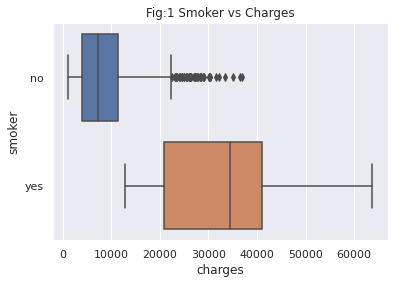

In [51]:
#smoker vs charges
sns.boxplot(x=insured.charges,y=insured.smoker,data=insured).set(title="Fig:1 Smoker vs Charges")

In [52]:
alpha=0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))


Test statistic = 30.168384427571915 , Pvalue =2.160499003168038e-118 , OnetailPvalue = 1.080249501584019e-118


In [53]:
if p_value_1 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion:Since P value 1.080249501584019e-118 is less than alpha 0.05 
Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide whethere to  reject or failed to reject null hypothesis</b></font><br>    
    We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke. Similar result can also been seen in Fig no.1 Smokers Vs Charges

# 2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

<div class ="alert alert-block alert-info">
    Let $\mu_1 \mu_2 $ and be the respective population means for BMI of males and BMI of females<br>
    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  : \mu_1 - \mu_2 = 0$ There is no difference between the BMI of Male  and BMI of female.<br>
$\ H_a  : \mu_1 - \mu_2 !=0 $ There is difference between the BMI of Male and BMI of female. <br>


</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3:Identify the test</b></font><br>Standard deviation of the population is not known ,will perform a T stat test.Not equal to sign in alternate hypothesis indicate its a two tailed test.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [54]:
#get all observation for male.
df_male=insured.loc[insured.sex=="male"]
#get all observation for females
df_female=insured.loc[insured.sex=="female"]


In [55]:
#get bmi of male and female
bmi_female=df_female.bmi
bmi_male=df_male.bmi

<AxesSubplot:xlabel='bmi', ylabel='Density'>

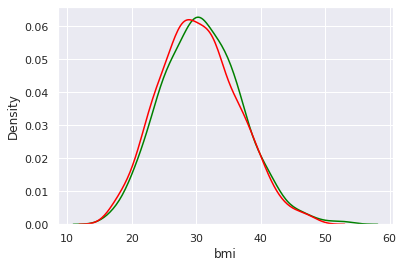

In [56]:
sns.distplot(bmi_male,color='green',hist=False)
sns.distplot(bmi_female,color='red',hist=False)

In [57]:
df_female.bmi.mean()

30.377749244713023

In [58]:
df_male.bmi.mean()

30.943128698224832

In [59]:
# get statistic and p value
t_statistic_2, p_value_2 = stats.ttest_ind(bmi_male, bmi_female)
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

tstats =  1.696752635752224 , pvalue =  0.08997637178984932


In [60]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2,alpha) )
    print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2,alpha))
    print("Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .")


Conclusion:Since P value 0.08997637178984932 is greater than alpha 0.05 
Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     We fail to reject the null hypothesis and can conclude that There is no difference between BMI of Female and BMI of Male. 

# 3.Is the proportion of smokers significantly different across different regions?

<div class ="alert alert-block alert-info">
    <font size=3><b>    Step 1: Define null and alternative hypotheses</b></font>

* H<sub>0</sub> Smokers proportions is not significantly different across different regions
* H<sub>a</sub> Smokers proportions is  different across different regions  <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify Test</b></font><br>
    Here we are comparing two different categorical variables, smoker and  different region. So perform a  Chi-sq Test.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [61]:
contigency= pd.crosstab(insured.region, insured.smoker)
contigency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<AxesSubplot:xlabel='region'>

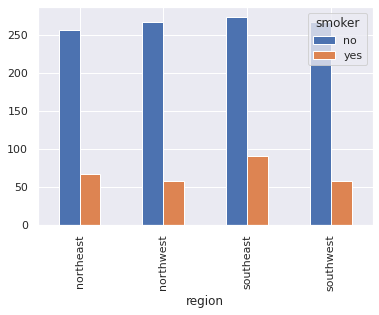

In [62]:
 contigency.plot(kind='bar')

In [63]:
# Using the chi2_contingency test 
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)
print('chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} ,expected frequencies: {} '.format(chi2, pval, dof, exp_freq))

chi-square statistic: 7.343477761407071 , Pvalue: 0.06171954839170541 , Degree of freedom: 3 ,expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


In [64]:
if (pval < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Failed to reject Null Hypothesis


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     We failed to reject the null hypothesis and conclude that Smoker proportions is not significantly different across different regions.
    


# 4.Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

<div class ="alert alert-block alert-info">
    <font size=3><b>    Step 1: Define null and alternative hypotheses</b></font>

* H<sub>0</sub>: μ1 = μ2 = μ3  The mean BMI of women with no children , one child,two children is same <br>

* H<sub>a</sub>:  Atleast  one of mean BMI of women is not same <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify Test</b></font><br>
    
One-way ANOVA - Equality of population through variances of samples.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [65]:
# Filtering data of only women with 0, 1 and 2 children
df_female_child = df_female.loc[df_female['children']<=2]
df_female_child.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
0,19,female,27.90,0,yes,25-35,18-28,southwest,16884.92400
5,31,female,25.74,0,no,25-35,28-38,southeast,3756.62160
6,46,female,33.44,1,no,25-35,38-48,southeast,8240.58960
9,60,female,25.84,0,no,25-35,58-68,northwest,28923.13692
11,62,female,26.29,0,yes,25-35,58-68,southeast,27808.72510


In [66]:
#pd.pivot_table(data=df_female_filtered,index=df_female_filtered.children,columns=df_female_filtered.bmi,values=df_female_filtered.bmi,fill_value=0)
df_female_child.groupby([df_female_child.children]).mean().bmi

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

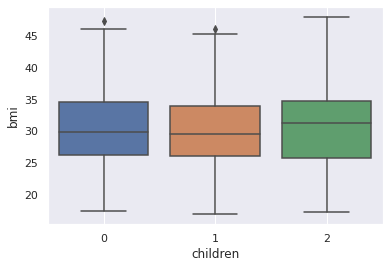

In [67]:
# Women BMI with children 0, 1, 2;
sns.boxplot(x="children", y="bmi", data=df_female_child)
plt.grid()
plt.show()

In [68]:

# Applying ANOVA and cheking each children count (0,1,2) with the bmi;
formula = 'bmi ~ C(children)'
model = ols(formula, df_female_child).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),2.0,24.590123,12.295062,0.334472,0.715858
Residual,563.0,20695.661583,36.759612,NaN,NaN


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     P value is 0.715858 and it is greater than aplha(0.05) ,We failed to  reject the null hypothesis and conclude that mean Bmi of women  with no children,one children, two children is same. 
    

### Recommendation
- Based on EDA and statistical  evidence it can be seen that  customer who smoke or   have higher  BMI  have more higher claims. We can encourage customers to quit smoking by providing them  incentive points  for talking to life coach, get help for improving lifestyle habits,  Quit Tobacco- 28 day program. Give gift cards when customer accumulates specific number of points.
- We can have Active wellness programs which can help up reduce claims related to BMI.
- High BMI  is primarily because of unhealthy life choices. We can provide customers with Diet plans and wellness health coaches which can help them to make right choices.
- Provide discount coupons  for Gym  or  fitness devices encouraging customers to exercise.


# Methodology

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Load data
ins = pd.read_csv("/kaggle/input/insurance/insurance.csv")
print("There are {:,} observations and {} columns in the data set.".format(ins.shape[0], ins.shape[1]))
print("There are {} missing values in the data.".format(ins.isna().sum().sum()))
ins['sex'] = ins['sex'].str.capitalize()
ins['smoker'] = ins['smoker'].apply(lambda x: 'Smoker' if x=='yes' else 'Non-Smoker')
ins['region'] = ins['region'].str.capitalize()

There are 1,338 observations and 7 columns in the data set.
There are 0 missing values in the data.


In [70]:
cat=ins.select_dtypes(include=['object']).columns.tolist()
for i in cat:
    obs=ins[i].value_counts()
    avg_claim=ins.groupby(i)["charges"].mean()
    display(pd.DataFrame({"Number of Policyholders":obs, "Average Claim Amount":avg_claim.map('${:,.2f}'.format)})\
            .sort_values('Number of Policyholders', ascending=False)\
            .style.set_caption("Variable: {}".format(i)))

,Number of Policyholders,Average Claim Amount
Male,676,"$13,956.75"
Female,662,"$12,569.58"


,Number of Policyholders,Average Claim Amount
Non-Smoker,1064,"$8,434.27"
Smoker,274,"$32,050.23"


,Number of Policyholders,Average Claim Amount
Southeast,364,"$14,735.41"
Northwest,325,"$12,417.58"
Southwest,325,"$12,346.94"
Northeast,324,"$13,406.38"


In [71]:
ins['female'] = ins['sex'].apply(lambda x: 1 if x=='Female' else 0)
ins['smoker_yes'] = ins['smoker'].apply(lambda x: 1 if x=='Smoker' else 0)
ins.drop(['sex', 'smoker'], axis=1, inplace=True)
ins.head()

,age,bmi,children,region,charges,female,smoker_yes
0,19,27.900,0,Southwest,16884.92400,1,1
1,18,33.770,1,Southeast,1725.55230,0,0
2,28,33.000,3,Southeast,4449.46200,0,0
3,33,22.705,0,Northwest,21984.47061,0,0
4,32,28.880,0,Northwest,3866.85520,0,0


To account for the relationships that two independent variables may have on healthcare costs, like smoking status and BMI, I will add interaction terms and second-order polynomial features to the models. This will add a squared term for each variable in the model and an interaction term between each pair of features.

There is an approximately equal number of beneficiaries in the four regions, between 324 and 364. To provide a more targeted cost prediction of future claims, I will fit separate models for each region. The models will first filter the data by region and then create individual training and test sets. I'll use several regression models to predict future insurance costs, including Linear Regression, K-Nearest Neighbors, Support Vector Machines, and Gradient Boosting. Hyperparameter tuning will be performed using cross-validation and then the models will be evaluated on the held-out test set.

## Linear Regression with PCA Dimensionality Reduction

With the addition of polynomial features, the number of variables in the dataset increases from 5 to 20. Due to the effects of multicollinearity, I will use Principal Component Analysis (PCA) to reduce the correlation between the features in the linear regression models. Principal Component Analysis is a technique that reduces the dimensionality of a data set by transforming variables that are potentially correlated into linearly uncorrelated principal components.

In [72]:
# Dataframe to save results
models=["Linear Regression", "KNN", "SVM", "Gradient Boosting"]
mod_res=pd.DataFrame(columns=["Average RMSE", "Avg. Adjusted R2"], index=models)
regions = ins.region.unique()
s = StandardScaler()

actuals=[]
preds=[]
rmses=[]
r2_scores=[]
adj_r2_scores=[]

In [73]:
# Dataframe to save results
models=["Linear Regression", "KNN", "SVM", "Gradient Boosting"]
mod_res=pd.DataFrame(columns=["Average RMSE", "Avg. Adjusted R2"], index=models)
regions = ins.region.unique()
s = StandardScaler()

actuals=[]
preds=[]
rmses=[]
r2_scores=[]
adj_r2_scores=[]

for i in regions:
    
    # Filter data by region
    print("\nRegion: {}\n".format(i))
    ins_df = ins[ins.region==i]
    X=ins_df.drop(['charges', 'region'], axis=1)
    y=ins_df.charges
    
    # Add polynomial features
    pf = PolynomialFeatures(degree=2, include_bias=False)
    X_pf = pd.DataFrame(data=pf.fit_transform(X), columns=pf.get_feature_names(X.columns))
    
    # Create training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.2, random_state=1)
    
    # Scale features
    X_train_scaled = s.fit_transform(X_train)
    X_test_scaled = s.transform(X_test)
    
    # PCA
    pca = PCA(.95)
    X_train_pca=pca.fit_transform(X_train_scaled)
    X_test_pca=pca.transform(X_test_scaled)
    print("Number of Principal Components = {}".format(pca.n_components_))
    print("Train Shape:{} {}  Test Shape:{} {}".format(X_train_pca.shape, y_train.shape, X_test_pca.shape, y_test.shape))
    
    # Linear Regression
    lr = LinearRegression().fit(X_train_pca, y_train)
    y_pred=lr.predict(X_test_pca)
    rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
    r2=r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_pca.shape[1]-1)
    
    actuals.append(pd.Series(y_test, name='actuals').reset_index())
    preds.append(pd.Series(y_pred, name='preds').reset_index(drop=True))
    rmses.append(rmse)
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)
    
    print("Test Error (RMSE) = {:,}".format(rmse))
    print("R-Squared = {:.2f}%, Adjusted R-Squared = {:.2f}%".format(r2*100, adj_r2*100))
    if i != 'Northeast':
        print("__________________________")


Region: Southwest

Number of Principal Components = 7
Train Shape:(260, 7) (260,)  Test Shape:(65, 7) (65,)
Test Error (RMSE) = 5,349.04
R-Squared = 79.15%, Adjusted R-Squared = 76.59%
__________________________

Region: Southeast

Number of Principal Components = 7
Train Shape:(291, 7) (291,)  Test Shape:(73, 7) (73,)
Test Error (RMSE) = 4,699.59
R-Squared = 90.32%, Adjusted R-Squared = 89.27%
__________________________

Region: Northwest

Number of Principal Components = 6
Train Shape:(260, 6) (260,)  Test Shape:(65, 6) (65,)
Test Error (RMSE) = 6,305.7
R-Squared = 74.43%, Adjusted R-Squared = 71.79%
__________________________

Region: Northeast

Number of Principal Components = 7
Train Shape:(259, 7) (259,)  Test Shape:(65, 7) (65,)
Test Error (RMSE) = 6,231.75
R-Squared = 63.27%, Adjusted R-Squared = 58.76%


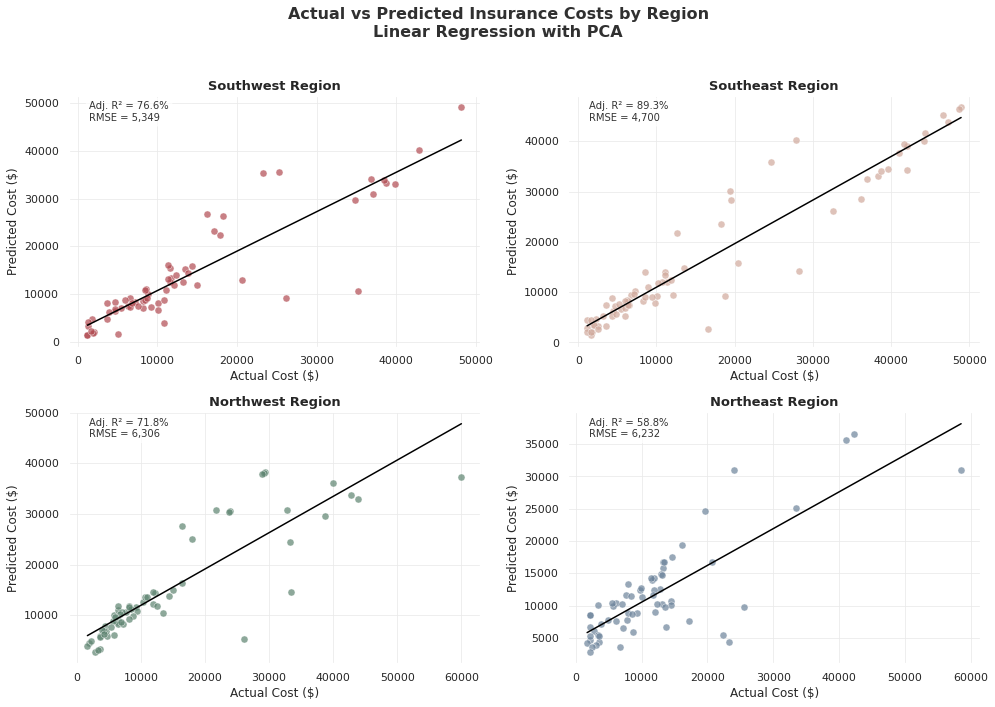

In [74]:
# Prepare data
for i in range(4):
    actuals[i].loc[:, 'region'] = regions[i]

actual = pd.concat([actuals[i] for i in range(4)], axis=0)
pred = pd.concat([preds[i] for i in range(4)], axis=0)
df = pd.concat([actual, pred], axis=1).reset_index(drop=True)
df.columns = ['index', 'actuals', 'region', 'preds']

# Define colors per region
colors = ["#B14B51", '#D0A99C', '#5D8370', '#6C839B']

# Set up figure — 2x2 grid (like facet_col_wrap=2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Scatter + trendline per region
for idx, region in enumerate(regions):
    ax = axes[idx]
    region_data = df[df['region'] == region]
    
    # Scatter plot
    sns.scatterplot(
        data=region_data,
        x='actuals',
        y='preds',
        color=colors[idx],
        alpha=0.7,
        s=50,
        edgecolor='white',
        ax=ax
    )
    
    # Trendline (OLS)
    lr = LinearRegression()
    X = region_data['actuals'].values.reshape(-1, 1)
    y = region_data['preds'].values
    lr.fit(X, y)
    y_pred_line = lr.predict(X)
    sns.lineplot(x=region_data['actuals'], y=y_pred_line, color='black', linewidth=1.5, ax=ax)
    
    # Titles & labels
    ax.set_title(f"{region} Region", fontsize=13, weight='bold')
    ax.set_xlabel("Actual Cost ($)")
    ax.set_ylabel("Predicted Cost ($)")
    
    # Add annotations for RMSE & Adj R²
    ax.text(
        0.05, 0.90,
        f"Adj. R² = {adj_r2_scores[idx]*100:.1f}%\nRMSE = {rmses[idx]:,.0f}",
        transform=ax.transAxes,
        fontsize=10,
        color='#333333',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
    )
    
    # Grid style
    ax.grid(True, which='major', linewidth=0.8, color='#EAEAEA')
    ax.set_facecolor('white')

# Global title
fig.suptitle("Actual vs Predicted Insurance Costs by Region\nLinear Regression with PCA", 
             fontsize=16, color="#303030", weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [75]:
mod_res.iloc[0,0]=pd.Series(rmses).mean()
mod_res.iloc[0,1]=pd.Series(adj_r2_scores).mean()
display(mod_res.iloc[:1,].sort_values("Average RMSE"))

,Average RMSE,Avg. Adjusted R2
Linear Regression,5646.52,0.741028


## K-Nearest Neighbors

In [76]:
actuals=[]
preds=[]
rmses=[]
r2_scores=[]
adj_r2_scores=[]

for i in regions:
    
    # Filter data by region
    ins_df = ins[ins.region==i]
    X=ins_df.drop(['charges', 'region'], axis=1)
    y=ins_df.charges
    
    # Add polynomial features
    pf = PolynomialFeatures(degree=2, include_bias=False)
    X_pf = pd.DataFrame(data=pf.fit_transform(X), columns=pf.get_feature_names(X.columns))
    
    # Create training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.2, random_state=1)
    X_train = pd.DataFrame(X_train, columns = X_pf.columns)
    X_test = pd.DataFrame(X_test, columns = X_pf.columns)
    actuals.append(pd.Series(y_test, name='actuals').reset_index())
    print("\nRegion: {}\n".format(i))
    print("Train Shape:{} {}  Test Shape:{} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))
    
    # Scale features
    X_train = pd.DataFrame(data=s.fit_transform(X_train), columns=X_pf.columns)
    X_test = pd.DataFrame(data=s.transform(X_test), columns=X_pf.columns)
    
    # KNN
    grid = {'n_neighbors': range(2, 20),
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [int(x) for x in np.linspace(10, 50, num = 5)],
            'p': [1, 2]}
    knn=KNeighborsRegressor()
    knn_cv=RandomizedSearchCV(estimator=knn, param_distributions=grid, scoring='neg_mean_squared_error', 
                              n_iter=100, cv=3, random_state=21, n_jobs=-1)
    knn_cv.fit(X_train, y_train)
    y_pred=knn_cv.predict(X_test)
    preds.append(pd.Series(y_pred, name='preds').reset_index(drop=True))
    rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
    r2=r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    rmses.append(rmse)
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)
    
    print("Test Error (RMSE) = {:,}".format(rmse))
    print("R-Squared = {:.2f}%, Adjusted R-Squared = {:.2f}%".format(r2*100, adj_r2*100))
    if i != 'Northeast':
        print("__________________________")


Region: Southwest

Train Shape:(260, 20) (260,)  Test Shape:(65, 20) (65,)
Test Error (RMSE) = 5,227.12
R-Squared = 80.09%, Adjusted R-Squared = 71.04%
__________________________

Region: Southeast

Train Shape:(291, 20) (291,)  Test Shape:(73, 20) (73,)
Test Error (RMSE) = 4,455.86
R-Squared = 91.29%, Adjusted R-Squared = 87.95%
__________________________

Region: Northwest

Train Shape:(260, 20) (260,)  Test Shape:(65, 20) (65,)
Test Error (RMSE) = 6,179.18
R-Squared = 75.45%, Adjusted R-Squared = 64.29%
__________________________

Region: Northeast

Train Shape:(259, 20) (259,)  Test Shape:(65, 20) (65,)
Test Error (RMSE) = 5,617.89
R-Squared = 70.15%, Adjusted R-Squared = 56.58%


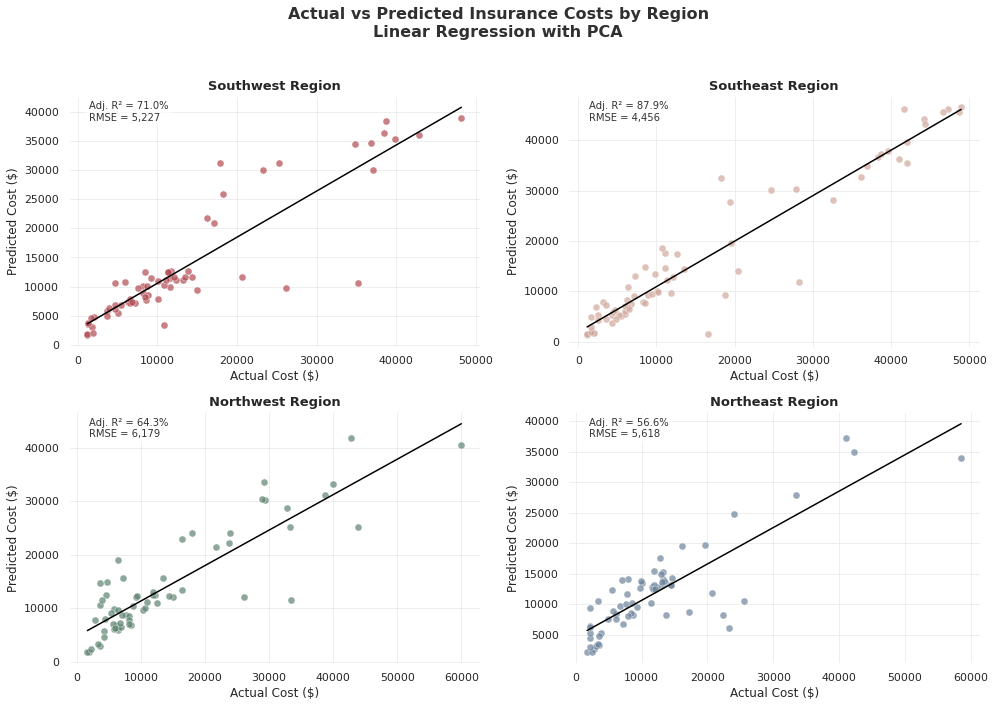

In [77]:
# Prepare data
for i in range(4):
    actuals[i].loc[:, 'region'] = regions[i]
    
actual = pd.concat([actuals[i] for i in range(4)], axis=0)
pred = pd.concat([preds[i] for i in range(4)], axis=0)
df = pd.concat([actual, pred], axis=1).reset_index(drop=True)
df.columns = ['index', 'actuals', 'region', 'preds']

# Define colors per region
colors = ["#B14B51", '#D0A99C', '#5D8370', '#6C839B']

# Set up figure — 2x2 grid (like facet_col_wrap=2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Scatter + trendline per region
for idx, region in enumerate(regions):
    ax = axes[idx]
    region_data = df[df['region'] == region]
    
    # Scatter plot
    sns.scatterplot(
        data=region_data,
        x='actuals',
        y='preds',
        color=colors[idx],
        alpha=0.7,
        s=50,
        edgecolor='white',
        ax=ax
    )
    
    # Trendline (OLS)
    lr = LinearRegression()
    X = region_data['actuals'].values.reshape(-1, 1)
    y = region_data['preds'].values
    lr.fit(X, y)
    y_pred_line = lr.predict(X)
    sns.lineplot(x=region_data['actuals'], y=y_pred_line, color='black', linewidth=1.5, ax=ax)
    
    # Titles & labels
    ax.set_title(f"{region} Region", fontsize=13, weight='bold')
    ax.set_xlabel("Actual Cost ($)")
    ax.set_ylabel("Predicted Cost ($)")
    
    # Add annotations for RMSE & Adj R²
    ax.text(
        0.05, 0.90,
        f"Adj. R² = {adj_r2_scores[idx]*100:.1f}%\nRMSE = {rmses[idx]:,.0f}",
        transform=ax.transAxes,
        fontsize=10,
        color='#333333',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
    )
    
    # Grid style
    ax.grid(True, which='major', linewidth=0.8, color='#EAEAEA')
    ax.set_facecolor('white')

# Global title
fig.suptitle("Actual vs Predicted Insurance Costs by Region\nLinear Regression with PCA", 
             fontsize=16, color="#303030", weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [78]:
mod_res.iloc[1,0]=pd.Series(rmses).mean()
mod_res.iloc[1,1]=pd.Series(adj_r2_scores).mean()
display(mod_res.iloc[:2,].sort_values("Average RMSE"))

,Average RMSE,Avg. Adjusted R2
KNN,5370.0125,0.699643
Linear Regression,5646.52,0.741028


## Support Vector Regression

In [79]:
actuals=[]
preds=[]
rmses=[]
r2_scores=[]
adj_r2_scores=[]
feat_importance=pd.DataFrame()

for i in regions:
    
    print("\nRegion: {}\n".format(i))
    
    # Filter data by region
    ins_df = ins[ins.region==i]
    X=ins_df.drop(['charges', 'region'], axis=1)
    y=ins_df.charges
    
    # Add polynomial features
    pf = PolynomialFeatures(degree=2, include_bias=False)
    X_pf = pd.DataFrame(data=pf.fit_transform(X), columns=pf.get_feature_names(X.columns))
    
    # Create training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.2, random_state=1)
    X_train = pd.DataFrame(X_train, columns = X_pf.columns)
    X_test = pd.DataFrame(X_test, columns = X_pf.columns)
    actuals.append(pd.Series(y_test, name='actuals').reset_index())
    
    # Scale features
    X_train = pd.DataFrame(data=s.fit_transform(X_train), columns=X_pf.columns)
    X_test = pd.DataFrame(data=s.transform(X_test), columns=X_pf.columns)
    
    # Tuning SVM
    grid = {'kernel':['linear','rbf','poly','sigmoid'],
            'C': np.logspace(-3, 3, 10),
            'gamma':np.logspace(-3, 3, 10)}
    svm = SVR()
    svm_cv=RandomizedSearchCV(estimator=svm, param_distributions=grid, scoring='neg_mean_squared_error', 
                              n_iter=10, cv=3, random_state=21, n_jobs=-1)
    svm_cv.fit(X_train, y_train)
    print("Best SVM Parameters:\n",svm_cv.best_params_)
    y_pred=svm_cv.predict(X_test)
    preds.append(pd.Series(y_pred, name='preds').reset_index(drop=True))
    rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
    r2=r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    rmses.append(rmse)
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)
    
    print("\nTest Error (RMSE) = {:,}".format(rmse))
    print("R-Squared = {:.2f}%, Adjusted R-Squared = {:.2f}%".format(r2*100, adj_r2*100))
    if i != 'Northeast':
        print("__________________________")


Region: Southwest

Best SVM Parameters:
 {'kernel': 'poly', 'gamma': 10.0, 'C': 0.021544346900318832}

Test Error (RMSE) = 5,119.96
R-Squared = 80.90%, Adjusted R-Squared = 72.21%
__________________________

Region: Southeast

Best SVM Parameters:
 {'kernel': 'poly', 'gamma': 10.0, 'C': 0.021544346900318832}

Test Error (RMSE) = 4,276.06
R-Squared = 91.98%, Adjusted R-Squared = 88.90%
__________________________

Region: Northwest

Best SVM Parameters:
 {'kernel': 'poly', 'gamma': 10.0, 'C': 0.021544346900318832}

Test Error (RMSE) = 6,092.5
R-Squared = 76.13%, Adjusted R-Squared = 65.28%
__________________________

Region: Northeast

Best SVM Parameters:
 {'kernel': 'poly', 'gamma': 10.0, 'C': 0.021544346900318832}

Test Error (RMSE) = 4,688.98
R-Squared = 79.21%, Adjusted R-Squared = 69.75%


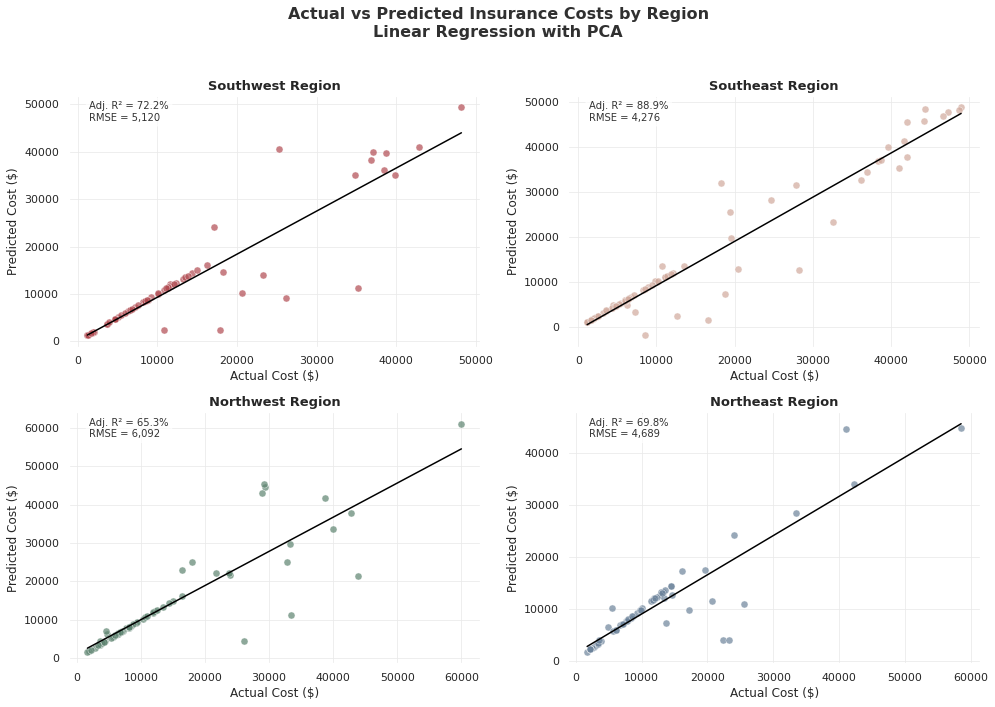

In [80]:
# Prepare data
for i in range(4):
    actuals[i].loc[:, 'region'] = regions[i]
    
actual = pd.concat([actuals[i] for i in range(4)], axis=0)
pred = pd.concat([preds[i] for i in range(4)], axis=0)
df = pd.concat([actual, pred], axis=1).reset_index(drop=True)
df.columns = ['index', 'actuals', 'region', 'preds']

# Define colors per region
colors = ["#B14B51", '#D0A99C', '#5D8370', '#6C839B']

# Set up figure — 2x2 grid (like facet_col_wrap=2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Scatter + trendline per region
for idx, region in enumerate(regions):
    ax = axes[idx]
    region_data = df[df['region'] == region]
    
    # Scatter plot
    sns.scatterplot(
        data=region_data,
        x='actuals',
        y='preds',
        color=colors[idx],
        alpha=0.7,
        s=50,
        edgecolor='white',
        ax=ax
    )
    
    # Trendline (OLS)
    lr = LinearRegression()
    X = region_data['actuals'].values.reshape(-1, 1)
    y = region_data['preds'].values
    lr.fit(X, y)
    y_pred_line = lr.predict(X)
    sns.lineplot(x=region_data['actuals'], y=y_pred_line, color='black', linewidth=1.5, ax=ax)
    
    # Titles & labels
    ax.set_title(f"{region} Region", fontsize=13, weight='bold')
    ax.set_xlabel("Actual Cost ($)")
    ax.set_ylabel("Predicted Cost ($)")
    
    # Add annotations for RMSE & Adj R²
    ax.text(
        0.05, 0.90,
        f"Adj. R² = {adj_r2_scores[idx]*100:.1f}%\nRMSE = {rmses[idx]:,.0f}",
        transform=ax.transAxes,
        fontsize=10,
        color='#333333',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
    )
    
    # Grid style
    ax.grid(True, which='major', linewidth=0.8, color='#EAEAEA')
    ax.set_facecolor('white')

# Global title
fig.suptitle("Actual vs Predicted Insurance Costs by Region\nLinear Regression with PCA", 
             fontsize=16, color="#303030", weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [81]:
mod_res.iloc[2,0]=pd.Series(rmses).mean()
mod_res.iloc[2,1]=pd.Series(adj_r2_scores).mean()
display(mod_res.iloc[:3,].sort_values("Average RMSE"))

,Average RMSE,Avg. Adjusted R2
SVM,5044.375,0.740378
KNN,5370.0125,0.699643
Linear Regression,5646.52,0.741028


## Gradient Boosting

In [82]:
actuals=[]
preds=[]
rmses=[]
r2_scores=[]
adj_r2_scores=[]
feat_importance=pd.DataFrame()

for i in regions:
    
    # Filter data by region
    ins_df = ins[ins.region==i]
    X=ins_df.drop(['charges', 'region'], axis=1)
    y=ins_df.charges
    
    # Add polynomial features
    pf = PolynomialFeatures(degree=2, include_bias=False)
    X_pf = pd.DataFrame(data=pf.fit_transform(X), columns=pf.get_feature_names(X.columns))
    
    # Create training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.2, random_state=1)
    X_train = pd.DataFrame(X_train, columns = X_pf.columns)
    X_test = pd.DataFrame(X_test, columns = X_pf.columns)
    actuals.append(pd.Series(y_test, name='actuals').reset_index())
    print("\nRegion: {}\n".format(i))
    print("Train Shape:{} {}  Test Shape:{} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))
    
    # Scale features
    X_train = pd.DataFrame(data=s.fit_transform(X_train), columns=X_pf.columns)
    X_test = pd.DataFrame(data=s.transform(X_test), columns=X_pf.columns)
    
    # Tuning 
    grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5],
            'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
            'subsample': [0.5, 0.8, 1],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_depth': [int(x) for x in np.linspace(2, 10, num = 5)],
            'max_features': [None, 'sqrt']}
    xgb=GradientBoostingRegressor(random_state=21)
    xgb_cv=RandomizedSearchCV(estimator=xgb, param_distributions=grid, scoring='neg_mean_squared_error', 
                              n_iter=100, cv=3, random_state=21, n_jobs=-1)
    xgb_cv.fit(X_train, y_train)
    y_pred=xgb_cv.predict(X_test)
    preds.append(pd.Series(y_pred, name='preds').reset_index(drop=True))
    rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
    r2=r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    rmses.append(rmse)
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)
    
    # Save feature importance
    feat_importance["Importance_"+str(i)]=xgb_cv.best_estimator_.feature_importances_
    
    print("Test Error (RMSE) = {:,}".format(rmse))
    print("R-Squared = {:.2f}%, Adjusted R-Squared = {:.2f}%".format(r2*100, adj_r2*100))
    if i != 'Northeast':
        print("__________________________")


Region: Southwest

Train Shape:(260, 20) (260,)  Test Shape:(65, 20) (65,)
Test Error (RMSE) = 4,117.69
R-Squared = 87.64%, Adjusted R-Squared = 82.03%
__________________________

Region: Southeast

Train Shape:(291, 20) (291,)  Test Shape:(73, 20) (73,)
Test Error (RMSE) = 3,212.02
R-Squared = 95.48%, Adjusted R-Squared = 93.74%
__________________________

Region: Northwest

Train Shape:(260, 20) (260,)  Test Shape:(65, 20) (65,)
Test Error (RMSE) = 4,559.91
R-Squared = 86.63%, Adjusted R-Squared = 80.55%
__________________________

Region: Northeast

Train Shape:(259, 20) (259,)  Test Shape:(65, 20) (65,)
Test Error (RMSE) = 5,275.79
R-Squared = 73.68%, Adjusted R-Squared = 61.71%


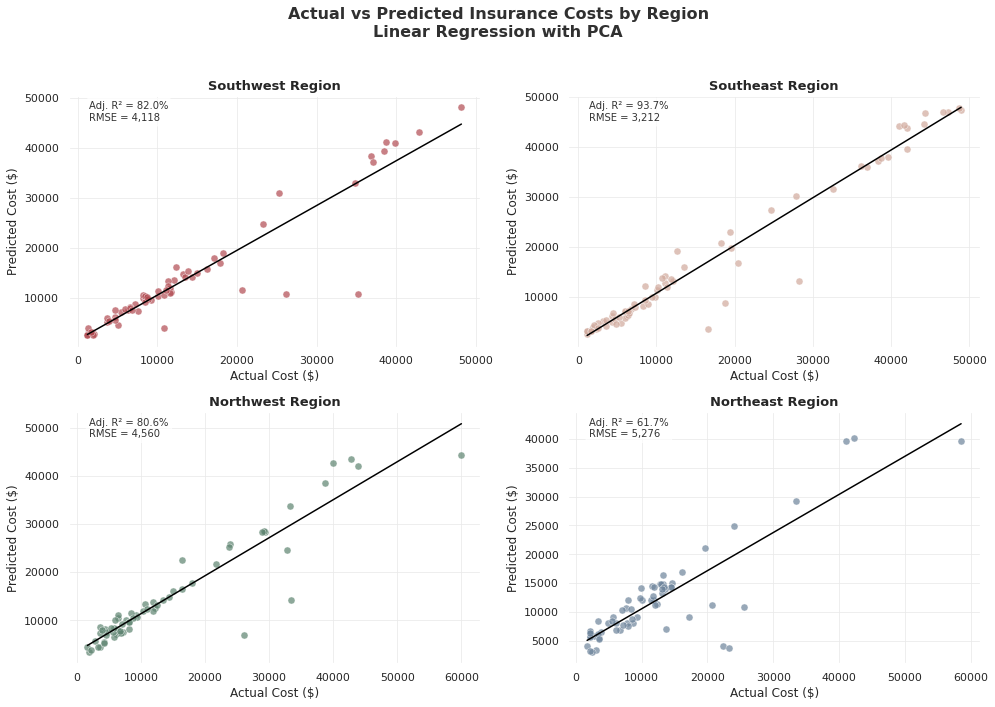

In [83]:
# Prepare data
for i in range(4):
    actuals[i].loc[:, 'region'] = regions[i]
    
actual = pd.concat([actuals[i] for i in range(4)], axis=0)
pred = pd.concat([preds[i] for i in range(4)], axis=0)
df = pd.concat([actual, pred], axis=1).reset_index(drop=True)
df.columns = ['index', 'actuals', 'region', 'preds']

# Define colors per region
colors = ["#B14B51", '#D0A99C', '#5D8370', '#6C839B']

# Set up figure — 2x2 grid (like facet_col_wrap=2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Scatter + trendline per region
for idx, region in enumerate(regions):
    ax = axes[idx]
    region_data = df[df['region'] == region]
    
    # Scatter plot
    sns.scatterplot(
        data=region_data,
        x='actuals',
        y='preds',
        color=colors[idx],
        alpha=0.7,
        s=50,
        edgecolor='white',
        ax=ax
    )
    
    # Trendline (OLS)
    lr = LinearRegression()
    X = region_data['actuals'].values.reshape(-1, 1)
    y = region_data['preds'].values
    lr.fit(X, y)
    y_pred_line = lr.predict(X)
    sns.lineplot(x=region_data['actuals'], y=y_pred_line, color='black', linewidth=1.5, ax=ax)
    
    # Titles & labels
    ax.set_title(f"{region} Region", fontsize=13, weight='bold')
    ax.set_xlabel("Actual Cost ($)")
    ax.set_ylabel("Predicted Cost ($)")
    
    # Add annotations for RMSE & Adj R²
    ax.text(
        0.05, 0.90,
        f"Adj. R² = {adj_r2_scores[idx]*100:.1f}%\nRMSE = {rmses[idx]:,.0f}",
        transform=ax.transAxes,
        fontsize=10,
        color='#333333',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
    )
    
    # Grid style
    ax.grid(True, which='major', linewidth=0.8, color='#EAEAEA')
    ax.set_facecolor('white')

# Global title
fig.suptitle("Actual vs Predicted Insurance Costs by Region\nLinear Regression with PCA", 
             fontsize=16, color="#303030", weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [84]:
mod_res.iloc[3,0]=pd.Series(rmses).mean()
mod_res.iloc[3,1]=pd.Series(adj_r2_scores).mean()
mod_res["Average RMSE"]=mod_res["Average RMSE"].map('{:,.2f}'.format)
mod_res["Avg. Adjusted R2"]=mod_res["Avg. Adjusted R2"].mul(100).map('{:.2f}%'.format)
display(mod_res.sort_values("Average RMSE"))

,Average RMSE,Avg. Adjusted R2
Gradient Boosting,"4,291.35",79.51%
SVM,"5,044.38",74.04%
KNN,"5,370.01",69.96%
Linear Regression,"5,646.52",74.10%


## Feature Importance 

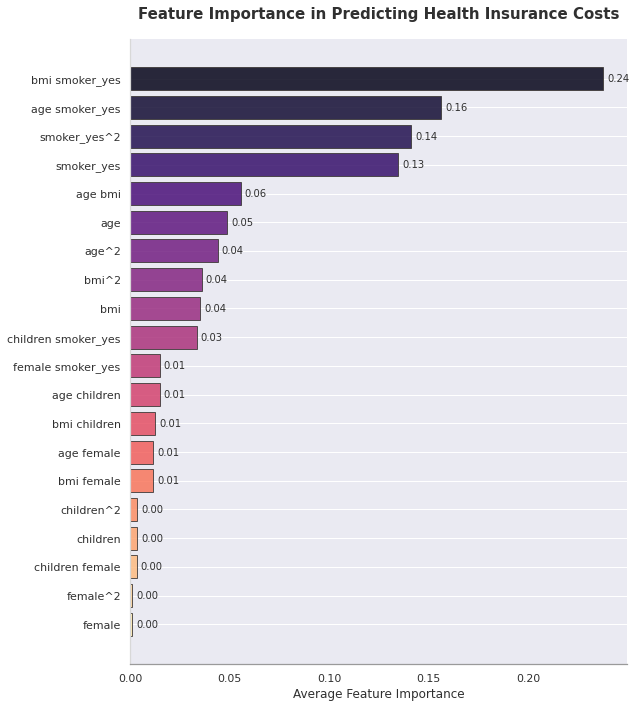

In [85]:
# Define reversed magma color palette (20 colors)
col = sns.color_palette("magma", 20).as_hex()[::-1]

# Prepare data
feat_importance.set_index(X_train.columns, inplace=True)
ft = pd.DataFrame({"Average Importance": feat_importance.mean(axis=1)})
plot_df = ft.nlargest(20, columns="Average Importance").sort_values(by="Average Importance", ascending=True)

# Assign colors from the reversed palette
colors = col[:len(plot_df)]

# Plot setup
plt.figure(figsize=(9, 10))
bars = plt.barh(plot_df.index, plot_df["Average Importance"], color=colors, edgecolor="#3F3B3A", alpha=0.85)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}", va='center', ha='left', fontsize=10, color='#303030')

# Title and axis labels
plt.title("Feature Importance in Predicting Health Insurance Costs", fontsize=15, weight='bold', color="#303030", pad=20)
plt.xlabel("Average Feature Importance", fontsize=12, color="#303030")
plt.ylabel("", fontsize=12)

# Style adjustments
plt.grid(axis='x', linestyle='--', color="#F5F5F5", linewidth=1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color("#D8D8D8")
plt.gca().spines['bottom'].set_color("#9A9A9A")

plt.tick_params(axis='both', colors="#303030")
plt.tight_layout()
plt.show()

Using the average feature importance's from the Gradient Boosting models, the interaction effect of a patient's BMI and their smoking status is the most important predictor of healthcare costs. Smoking status produces the highest average importance across the models with interactions between age and BMI among the top 5 predictors. The polynomial features of Age and BMI are also within the top 10, while gender and children are among the lowest.

In predicting insurance costs, Gradient Boosting provides the best results in the Southwest, Southeast, and Northwest regions, while the Support Vector model produces the lowest test error in the Northeast region. The models can explain over 93% of the observed variation in insurance costs in the Southeast region to almost 70% in the Northeast with the SVM model.

The polynomial features and interaction effects that were added to the models were among some of the most important predictors of health insurance costs, particularly between a patient's smoking status and their BMI. We also saw that healthcare costs increase with age and are notably higher in smokers. Gender and number of children had the least amount of influence in the models overall.

The Gradient Boosting model in the Northeast could potentially be improved with additional hyperparameter tuning or the company could implement a hybrid modeling approach that uses both boosted trees and support vector regression to predict insurance claims by region.

# Modifying Original Dataframe

In [150]:
import numpy as np
import pandas as pd


# Plotly Packages
from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats


# Regression Modeling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


# Other Libraries
import warnings
warnings.filterwarnings("ignore")

In [151]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

# Let's store the original dataframe in another variable.
original_df = df.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Distribution of Medical Charges**

Types of Distributions: We have a right skewed distribution in which most patients are being charged between  2000−
 12000.
 
Using Logarithms: Logarithms helps us have a normal distribution which could help us in a number of different ways such as outlier detection, implementation of statistical concepts based on the central limit theorem and for our predictive modell in the foreseen future. (We will come to this later in the kernel)

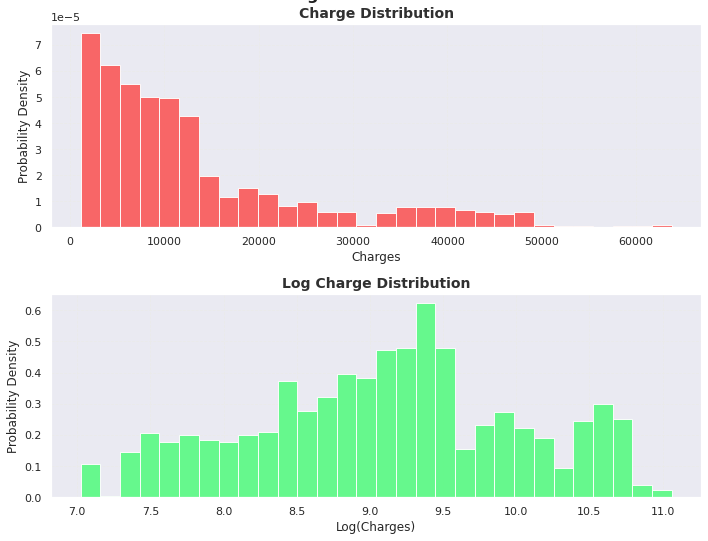

In [88]:
# Data
charge_dist = df["charges"].values
logcharge = np.log(df["charges"])

# Set up figure with two subplots (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 1️⃣ Original Charge Distribution
axes[0].hist(charge_dist, bins=30, color='#FA5858', edgecolor='white', alpha=0.9, density=True)
axes[0].set_title("Charge Distribution", fontsize=14, fontweight='bold', color="#303030")
axes[0].set_xlabel("Charges", fontsize=12)
axes[0].set_ylabel("Probability Density", fontsize=12)
axes[0].grid(True, linestyle='--', color='#EAEAEA', linewidth=0.8)

# 2️⃣ Log-Transformed Charge Distribution
axes[1].hist(logcharge, bins=30, color='#58FA82', edgecolor='white', alpha=0.9, density=True)
axes[1].set_title("Log Charge Distribution", fontsize=14, fontweight='bold', color="#303030")
axes[1].set_xlabel("Log(Charges)", fontsize=12)
axes[1].set_ylabel("Probability Density", fontsize=12)
axes[1].grid(True, linestyle='--', color='#EAEAEA', linewidth=0.8)

# Main title
fig.suptitle("Charge Distribution", fontsize=16, fontweight='bold', color="#202020", y=0.97)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Create Feature: Age Category

*Age Analysis*

Turning Age into Categorical Variables:

Young Adult: from 18 - 35

Senior Adult: from 36 - 55

Elder: 56 or older

Share of each Category: Young Adults (42.9%), Senior Adults (41%) and Elder (16.1%)

In [152]:
df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'

df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult


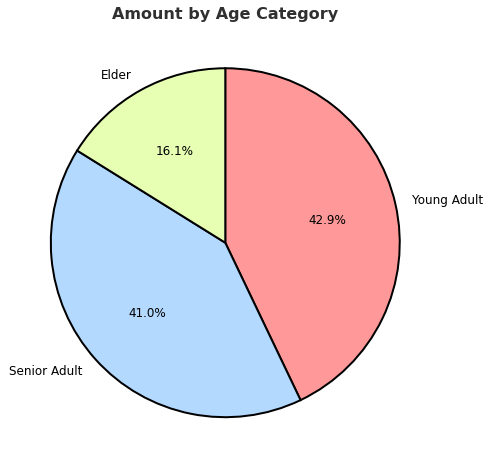

In [90]:
# Data
labels = df["age_cat"].unique().tolist()
amount = df["age_cat"].value_counts().tolist()

# Colors (cleaned spacing)
colors = ["#ff9999", "#b3d9ff", "#e6ffb3"]

# Create pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    amount,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    textprops={'fontsize': 12, 'color': 'black'},
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'black', 'linewidth': 2}
)

# Add chart title
plt.title("Amount by Age Category", fontsize=16, fontweight='bold', color="#303030")

# Adjust layout and display
plt.tight_layout()
plt.show()

**Is there a Relationship between BMI and Age**

BMI frequency: Most of the BMI frequency is concentrated between 27 - 33.

Correlations Age and charges have a correlation of 0.29 while bmi and charges have a correlation of 0.19

Relationship betweem BMI and Age: The correlation for these two variables is 0.10 
which is not that great. Therefore, we can disregard that age has a huge influence on BMI.

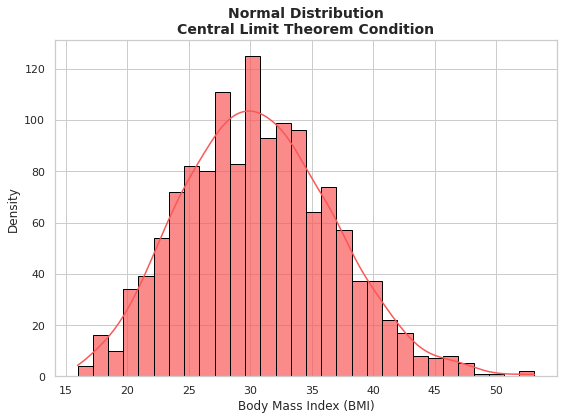

In [91]:
# Data
bmi = df["bmi"].values

# Set style
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Distribution plot (histogram + KDE)
sns.histplot(bmi, bins=30, kde=True, color='#FA5858', edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('Normal Distribution\nCentral Limit Theorem Condition', fontsize=14, fontweight='bold')
plt.xlabel('Body Mass Index (BMI)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Display plot
plt.tight_layout()
plt.show()

**Comparing Independent Categorical Variables (ANOVA)**

P-value: The p-value being higher than 0.05 tells us that we take the Null hypothesis, meaning that there is no a significant change between the three age categories when it comes to Body Mass Index.

In [92]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


moore_lm = ols("bmi ~ age_cat", data=df).fit()
print(moore_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.949
Date:                Thu, 06 Nov 2025   Prob (F-statistic):            0.00268
Time:                        18:37:03   Log-Likelihood:                -4311.2
No. Observations:                1338   AIC:                             8628.
Df Residuals:                    1335   BIC:                             8644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

**Who got charged more on Average by Age?**

Patient Charge Mean: For young adults it is 7,944, for Senior Adults it is 14,785 and for the elder it is 18,795.

Patient Charge Median: For young adults it is 4,252, for Senior Adults it is 9,565 and for the elder it is 13,429.

Mean and the Median: Sometimes we must be careful when using the mean since it is prone to be affected by outliers.

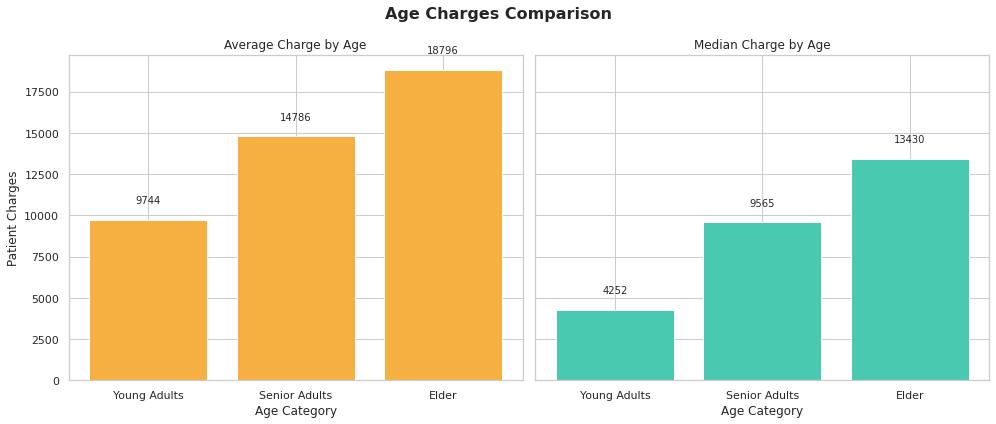

In [93]:
# Mean could be affected easily by outliers or extreme cases.
# Means
avg_ya_charge = df["charges"].loc[df["age_cat"] == "Young Adult"].mean()
avg_sa_charge = df["charges"].loc[df["age_cat"] == "Senior Adult"].mean()
avg_e_charge = df["charges"].loc[df["age_cat"] == "Elder"].mean()

# Median
med_ya_charge = df["charges"].loc[df["age_cat"] == "Young Adult"].median()
med_sa_charge = df["charges"].loc[df["age_cat"] == "Senior Adult"].median()
med_e_charge = df["charges"].loc[df["age_cat"] == "Elder"].median()

# Data
age_categories = ['Young Adults', 'Senior Adults', 'Elder']
means = [avg_ya_charge, avg_sa_charge, avg_e_charge]
medians = [med_ya_charge, med_sa_charge, med_e_charge]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Colors (matching Plotly scheme)
mean_color = "#F5B041"
median_color = "#48C9B0"

# ---- Plot 1: Mean Charges ----
axes[0].bar(age_categories, means, color=mean_color)
axes[0].set_title("Average Charge by Age")
axes[0].set_xlabel("Age Category")
axes[0].set_ylabel("Patient Charges")

# Annotate values
for i, v in enumerate(means):
    axes[0].text(i, v + 1000, f"{v:.0f}", ha='center', fontsize=10)

# ---- Plot 2: Median Charges ----
axes[1].bar(age_categories, medians, color=median_color)
axes[1].set_title("Median Charge by Age")
axes[1].set_xlabel("Age Category")

# Annotate values
for i, v in enumerate(medians):
    axes[1].text(i, v + 1000, f"{v:.0f}", ha='center', fontsize=10)

fig.suptitle("Age Charges Comparison", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Create Feature BMI Category

**Turning BMI into Categorical Variables:**

- Under Weight: Body Mass Index (BMI)  <
  18.5
- Normal Weight: Body Mass Index (BMI)  ≥
  18.5 and Body Mass Index (BMI)  <
  24.9
- Overweight: Body Mass Index (BMI)  ≥
  25 and Body Mass Index (BMI)  <
  29.9
- Obese: Body Mass Index (BMI)  >
  30

In [153]:
df["weight_condition"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
    
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight


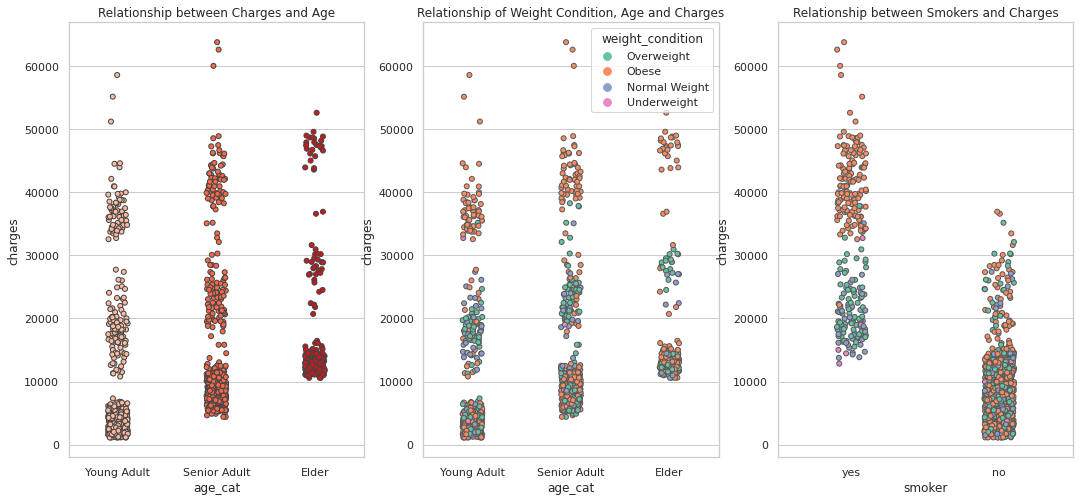

In [95]:
# Create subpplots
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,8))

# I wonder if the cluster that is on the top is from obese people
sns.stripplot(x="age_cat", y="charges", data=df, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Relationship between Charges and Age")


sns.stripplot(x="age_cat", y="charges", hue="weight_condition", data=df, ax=ax2, linewidth=1, palette="Set2")
ax2.set_title("Relationship of Weight Condition, Age and Charges")

sns.stripplot(x="smoker", y="charges", hue="weight_condition", data=df, ax=ax3, linewidth=1, palette="Set2")
ax3.legend_.remove()
ax3.set_title("Relationship between Smokers and Charges")

plt.show()

In [96]:
# Make sure we don't have any null values
df[df.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition


**Weight Status vs Charges**

Overweight: Notice how there are two groups of people that get significantly charged more than the other group of overweight people.

Obese: Same thing goes with the obese group, were a significant group is charged more than the other group.

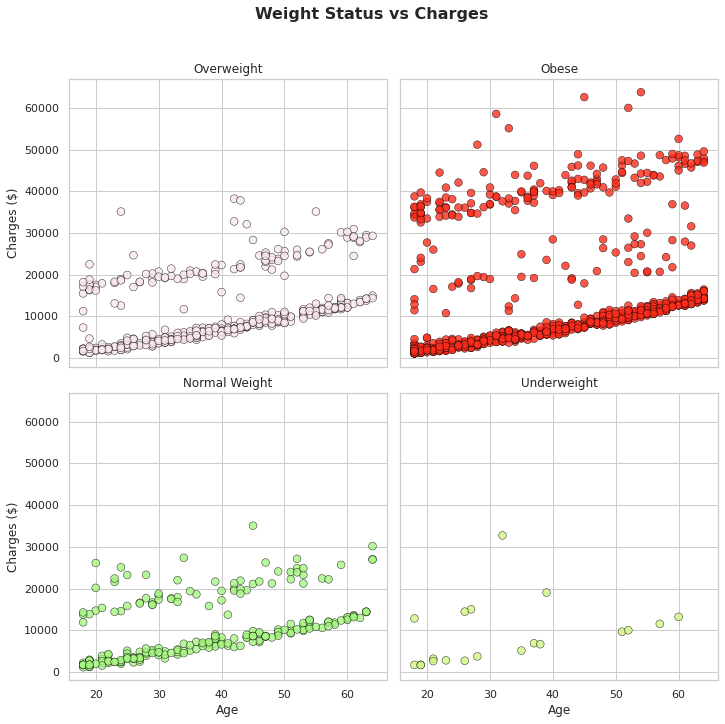

In [97]:
# Set up custom color palette (same as Plotly)
palette = {
    'Underweight': 'rgb(208, 246, 130)',
    'Normal Weight': 'rgb(166, 246, 130)',
    'Overweight': 'rgb(251, 232, 238)',
    'Obese': 'rgb(253, 45, 28)'
}

# Convert 'rgb(r, g, b)' strings → valid hex or tuple
palette = {
    k: tuple(int(c) / 255 for c in v.replace('rgb(', '').replace(')', '').split(','))
    for k, v in palette.items()
}

# Create facet grid using seaborn
g = sns.FacetGrid(
    df,
    col="weight_condition",
    col_wrap=2,
    height=5,
    palette=palette,
    despine=False
)

# Map scatter plots
g.map_dataframe(
    sns.scatterplot,
    x="age",
    y="charges",
    hue="weight_condition",
    palette=palette,
    s=60,
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    legend=False
)

# Customize titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Age", "Charges ($)")
plt.subplots_adjust(top=0.88)
g.fig.suptitle("Weight Status vs Charges", fontsize=16, fontweight="bold")
plt.show()

# Create  Feature Charge Status

In [154]:
# First find the average or median of the charges obese people paid.

obese_avg = df["charges"].loc[df["weight_condition"] == "Obese"].mean()

df["charge_status"] = np.nan
lst = [df]


for col in lst:
    col.loc[col["charges"] > obese_avg, "charge_status"] = "Above Average"
    col.loc[col["charges"] < obese_avg, "charge_status"] = "Below Average"
    
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition,charge_status
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight,Above Average
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese,Below Average
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese,Below Average
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight,Above Average
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight,Below Average


**Distribution of Charges (Obese Smoker vs Obese non-Smoker)**
- Violin Plots: We will be using violin plots to compare the distributions of patients of the obese group who are smokers and non-smokers.
- Obese smokers distribution: Most obese smokers pay around 40k in medical costs!
- Obese non-smokers distribution: Most obese non-smokers pay 8k in medical costs.
- Smoking a factor to the wallet Smoking is defninitely a big factor for obese patients when it comes to medical cost. A difference of more than 30k!

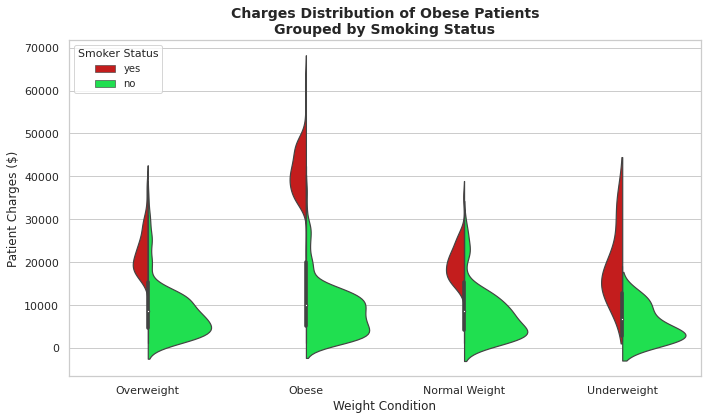

In [99]:
# Set figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Define colors similar to your Plotly ones
colors = {"yes": "#DF0101", "no": "#00FF40"}

# Filter only obese patients (as in your Plotly title)
subset = df[df["weight_condition"].isin(df["weight_condition"].unique())]

# Create base violin plot
sns.violinplot(
    data=subset,
    x="weight_condition",
    y="charges",
    hue="smoker",
    palette=colors,
    split=True,          # Show smoker and non-smoker on opposite sides
    inner="box",         # Show box inside violin
    linewidth=1.2,
    scale="count"
)

# Customize labels and title
plt.title("Charges Distribution of Obese Patients\nGrouped by Smoking Status", fontsize=14, weight='bold')
plt.xlabel("Weight Condition", fontsize=12)
plt.ylabel("Patient Charges ($)", fontsize=12)

# Customize legend
plt.legend(title="Smoker Status", title_fontsize=11, fontsize=10, loc="upper left", frameon=True)

plt.tight_layout()
plt.show()

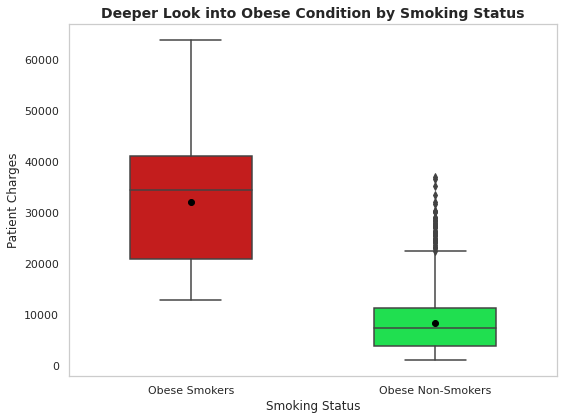

In [101]:
chargedist_sm = df["charges"].loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")].values
chargedist_nsm = df["charges"].loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no")].values

# Set up figure
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Define custom colors (matching Plotly)
palette = {"yes": "#DF0101", "no": "#00FF40"}

# Create boxplot
sns.boxplot(
    data=subset,
    x="smoker",
    y="charges",
    palette=palette,
    width=0.5,
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black", "markersize": 6},
)

# Customize axes labels and title
plt.title("Deeper Look into Obese Condition by Smoking Status", fontsize=14, weight='bold')
plt.xlabel("Smoking Status", fontsize=12)
plt.ylabel("Patient Charges", fontsize=12)

# Customize tick labels
plt.xticks([0, 1], ["Obese Smokers", "Obese Non-Smokers"])

# Add grid and display
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Separation in Charges between Obese Smokers vs Non-Obese Smokers**

In this chart we can visualize how can separate obese smokers and obese non-smokers into different clusters of groups. Therefore, we can say that smoking is a characteristic that definitely affects patient's charges.

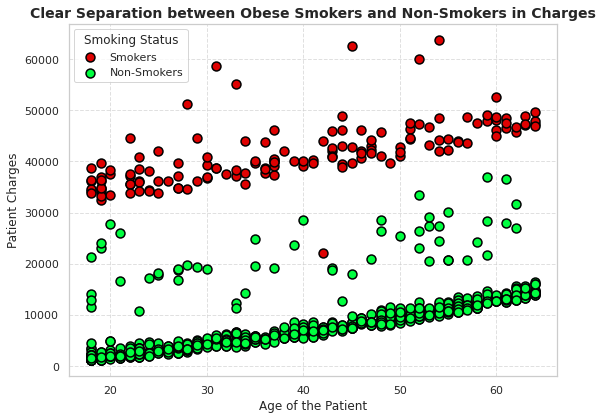

In [102]:
# Filter data
obese_smoker = df[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")]
obese_nonsmoker = df[(df["weight_condition"] == "Obese") & (df["smoker"] == "no")]

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Plot smokers
plt.scatter(
    obese_smoker["age"],
    obese_smoker["charges"],
    color="#DF0101",
    s=80,  # point size
    edgecolor="black",
    linewidth=1.5,
    label="Smokers"
)

# Plot non-smokers
plt.scatter(
    obese_nonsmoker["age"],
    obese_nonsmoker["charges"],
    color="#00FF40",
    s=80,
    edgecolor="black",
    linewidth=1.5,
    label="Non-Smokers"
)

# Title and labels
plt.title("Clear Separation between Obese Smokers and Non-Smokers in Charges", fontsize=14, weight='bold')
plt.xlabel("Age of the Patient", fontsize=12)
plt.ylabel("Patient Charges", fontsize=12)

# Legend and grid
plt.legend(title="Smoking Status")
plt.grid(True, linestyle="--", alpha=0.6)

# Layout and show
plt.tight_layout()
plt.show()

# Creatuing feature Stress Level

In [155]:
# BMI + Children / Age
df["stress_level"] = df["children"] * df["age"] / df["bmi"]

df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition,charge_status,stress_level
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight,Above Average,0.000000
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese,Below Average,0.533017
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese,Below Average,2.545455
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight,Above Average,0.000000
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight,Below Average,0.000000


In [156]:
df = df.drop(["age","bmi"], axis=1)
df.head()

,sex,children,smoker,region,charges,age_cat,weight_condition,charge_status,stress_level
0,female,0,yes,southwest,16884.92400,Young Adult,Overweight,Above Average,0.000000
1,male,1,no,southeast,1725.55230,Young Adult,Obese,Below Average,0.533017
2,male,3,no,southeast,4449.46200,Young Adult,Obese,Below Average,2.545455
3,male,0,no,northwest,21984.47061,Young Adult,Normal Weight,Above Average,0.000000
4,male,0,no,northwest,3866.85520,Young Adult,Overweight,Below Average,0.000000


In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.00000,2.000000,5.000000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.03300,16639.912515,63770.428010
stress_level,1338.0,1.463468,1.758945,0.0000,0.00000,1.02291,2.384997,10.655738


In [158]:
Nominal_fetaures = ["sex","smoker","age_cat",
                    "weight_condition","charge_status"]

In [159]:
# Encoding Categorical Features
def encode_categorical_features(df, cols):
    
    for col in cols:
        dummies = pd.get_dummies(df[col], dtype=int, prefix=col)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(labels=col, axis=1)
    return df

# Encode the categorical features in the training and test sets
df = encode_categorical_features(df, Nominal_fetaures)
df.head()

,children,region,charges,stress_level,sex_female,sex_male,smoker_no,smoker_yes,age_cat_Elder,age_cat_Senior Adult,age_cat_Young Adult,weight_condition_Normal Weight,weight_condition_Obese,weight_condition_Overweight,weight_condition_Underweight,charge_status_Above Average,charge_status_Below Average
0,0,southwest,16884.92400,0.000000,1,0,0,1,0,0,1,0,0,1,0,1,0
1,1,southeast,1725.55230,0.533017,0,1,1,0,0,0,1,0,1,0,0,0,1
2,3,southeast,4449.46200,2.545455,0,1,1,0,0,0,1,0,1,0,0,0,1
3,0,northwest,21984.47061,0.000000,0,1,1,0,0,0,1,1,0,0,0,1,0
4,0,northwest,3866.85520,0.000000,0,1,1,0,0,0,1,0,0,1,0,0,1


# Create Model With Engineered Feature

In [160]:
ins_df=df.copy()
ins_df.head()

,children,region,charges,stress_level,sex_female,sex_male,smoker_no,smoker_yes,age_cat_Elder,age_cat_Senior Adult,age_cat_Young Adult,weight_condition_Normal Weight,weight_condition_Obese,weight_condition_Overweight,weight_condition_Underweight,charge_status_Above Average,charge_status_Below Average
0,0,southwest,16884.92400,0.000000,1,0,0,1,0,0,1,0,0,1,0,1,0
1,1,southeast,1725.55230,0.533017,0,1,1,0,0,0,1,0,1,0,0,0,1
2,3,southeast,4449.46200,2.545455,0,1,1,0,0,0,1,0,1,0,0,0,1
3,0,northwest,21984.47061,0.000000,0,1,1,0,0,0,1,1,0,0,0,1,0
4,0,northwest,3866.85520,0.000000,0,1,1,0,0,0,1,0,0,1,0,0,1


# LR

In [161]:
models=["Linear Regression", "KNN", "SVM", "Gradient Boosting"]
mod_res=pd.DataFrame(columns=["Average RMSE", "Avg. Adjusted R2"], index=models)
regions = ins.region.unique()
s = StandardScaler()

actuals=[]
preds=[]
rmses=[]
r2_scores=[]
adj_r2_scores=[]

for i in regions:
    
    # Filter data by region
    print("\nRegion: {}\n".format(i))
    ins_df = ins[ins.region==i]
    X=ins_df.drop(['charges', 'region'], axis=1)
    y=ins_df.charges
    
    # Add polynomial features
    pf = PolynomialFeatures(degree=2, include_bias=False)
    X_pf = pd.DataFrame(data=pf.fit_transform(X), columns=pf.get_feature_names(X.columns))
    
    # Create training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.2, random_state=1)
    
    # Scale features
    X_train_scaled = s.fit_transform(X_train)
    X_test_scaled = s.transform(X_test)
    
    # PCA
    pca = PCA(.95)
    X_train_pca=pca.fit_transform(X_train_scaled)
    X_test_pca=pca.transform(X_test_scaled)
    print("Number of Principal Components = {}".format(pca.n_components_))
    print("Train Shape:{} {}  Test Shape:{} {}".format(X_train_pca.shape, y_train.shape, X_test_pca.shape, y_test.shape))
    
    # Linear Regression
    lr = LinearRegression().fit(X_train_pca, y_train)
    y_pred=lr.predict(X_test_pca)
    rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
    r2=r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_pca.shape[1]-1)
    
    actuals.append(pd.Series(y_test, name='actuals').reset_index())
    preds.append(pd.Series(y_pred, name='preds').reset_index(drop=True))
    rmses.append(rmse)
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)
    
    print("Test Error (RMSE) = {:,}".format(rmse))
    print("R-Squared = {:.2f}%, Adjusted R-Squared = {:.2f}%".format(r2*100, adj_r2*100))
    if i != 'Northeast':
        print("__________________________")


Region: Southwest

Number of Principal Components = 7
Train Shape:(260, 7) (260,)  Test Shape:(65, 7) (65,)
Test Error (RMSE) = 5,349.04
R-Squared = 79.15%, Adjusted R-Squared = 76.59%
__________________________

Region: Southeast

Number of Principal Components = 7
Train Shape:(291, 7) (291,)  Test Shape:(73, 7) (73,)
Test Error (RMSE) = 4,699.59
R-Squared = 90.32%, Adjusted R-Squared = 89.27%
__________________________

Region: Northwest

Number of Principal Components = 6
Train Shape:(260, 6) (260,)  Test Shape:(65, 6) (65,)
Test Error (RMSE) = 6,305.7
R-Squared = 74.43%, Adjusted R-Squared = 71.79%
__________________________

Region: Northeast

Number of Principal Components = 7
Train Shape:(259, 7) (259,)  Test Shape:(65, 7) (65,)
Test Error (RMSE) = 6,231.75
R-Squared = 63.27%, Adjusted R-Squared = 58.76%


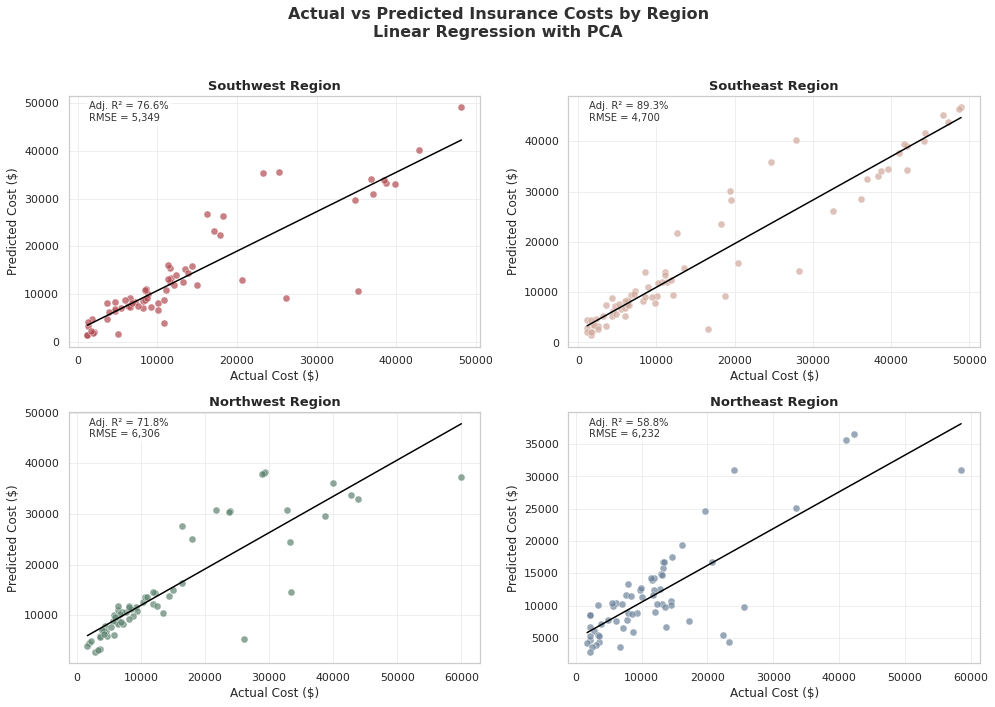

In [162]:
# Prepare data
for i in range(4):
    actuals[i].loc[:, 'region'] = regions[i]

actual = pd.concat([actuals[i] for i in range(4)], axis=0)
pred = pd.concat([preds[i] for i in range(4)], axis=0)
df = pd.concat([actual, pred], axis=1).reset_index(drop=True)
df.columns = ['index', 'actuals', 'region', 'preds']

# Define colors per region
colors = ["#B14B51", '#D0A99C', '#5D8370', '#6C839B']

# Set up figure — 2x2 grid (like facet_col_wrap=2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Scatter + trendline per region
for idx, region in enumerate(regions):
    ax = axes[idx]
    region_data = df[df['region'] == region]
    
    # Scatter plot
    sns.scatterplot(
        data=region_data,
        x='actuals',
        y='preds',
        color=colors[idx],
        alpha=0.7,
        s=50,
        edgecolor='white',
        ax=ax
    )
    
    # Trendline (OLS)
    lr = LinearRegression()
    X = region_data['actuals'].values.reshape(-1, 1)
    y = region_data['preds'].values
    lr.fit(X, y)
    y_pred_line = lr.predict(X)
    sns.lineplot(x=region_data['actuals'], y=y_pred_line, color='black', linewidth=1.5, ax=ax)
    
    # Titles & labels
    ax.set_title(f"{region} Region", fontsize=13, weight='bold')
    ax.set_xlabel("Actual Cost ($)")
    ax.set_ylabel("Predicted Cost ($)")
    
    # Add annotations for RMSE & Adj R²
    ax.text(
        0.05, 0.90,
        f"Adj. R² = {adj_r2_scores[idx]*100:.1f}%\nRMSE = {rmses[idx]:,.0f}",
        transform=ax.transAxes,
        fontsize=10,
        color='#333333',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
    )
    
    # Grid style
    ax.grid(True, which='major', linewidth=0.8, color='#EAEAEA')
    ax.set_facecolor('white')

# Global title
fig.suptitle("Actual vs Predicted Insurance Costs by Region\nLinear Regression with PCA", 
             fontsize=16, color="#303030", weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [163]:
mod_res.iloc[0,0]=pd.Series(rmses).mean()
mod_res.iloc[0,1]=pd.Series(adj_r2_scores).mean()
display(mod_res.iloc[:1,].sort_values("Average RMSE"))

,Average RMSE,Avg. Adjusted R2
Linear Regression,5646.52,0.741028


# KNN

In [164]:
actuals=[]
preds=[]
rmses=[]
r2_scores=[]
adj_r2_scores=[]

for i in regions:
    
    # Filter data by region
    ins_df = ins[ins.region==i]
    X=ins_df.drop(['charges', 'region'], axis=1)
    y=ins_df.charges
    
    # Add polynomial features
    pf = PolynomialFeatures(degree=2, include_bias=False)
    X_pf = pd.DataFrame(data=pf.fit_transform(X), columns=pf.get_feature_names(X.columns))
    
    # Create training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.2, random_state=1)
    X_train = pd.DataFrame(X_train, columns = X_pf.columns)
    X_test = pd.DataFrame(X_test, columns = X_pf.columns)
    actuals.append(pd.Series(y_test, name='actuals').reset_index())
    print("\nRegion: {}\n".format(i))
    print("Train Shape:{} {}  Test Shape:{} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))
    
    # Scale features
    X_train = pd.DataFrame(data=s.fit_transform(X_train), columns=X_pf.columns)
    X_test = pd.DataFrame(data=s.transform(X_test), columns=X_pf.columns)
    
    # KNN
    grid = {'n_neighbors': range(2, 20),
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [int(x) for x in np.linspace(10, 50, num = 5)],
            'p': [1, 2]}
    knn=KNeighborsRegressor()
    knn_cv=RandomizedSearchCV(estimator=knn, param_distributions=grid, scoring='neg_mean_squared_error', 
                              n_iter=100, cv=3, random_state=21, n_jobs=-1)
    knn_cv.fit(X_train, y_train)
    y_pred=knn_cv.predict(X_test)
    preds.append(pd.Series(y_pred, name='preds').reset_index(drop=True))
    rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
    r2=r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    rmses.append(rmse)
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)
    
    print("Test Error (RMSE) = {:,}".format(rmse))
    print("R-Squared = {:.2f}%, Adjusted R-Squared = {:.2f}%".format(r2*100, adj_r2*100))
    if i != 'Northeast':
        print("__________________________")


Region: Southwest

Train Shape:(260, 20) (260,)  Test Shape:(65, 20) (65,)
Test Error (RMSE) = 5,227.12
R-Squared = 80.09%, Adjusted R-Squared = 71.04%
__________________________

Region: Southeast

Train Shape:(291, 20) (291,)  Test Shape:(73, 20) (73,)
Test Error (RMSE) = 4,455.86
R-Squared = 91.29%, Adjusted R-Squared = 87.95%
__________________________

Region: Northwest

Train Shape:(260, 20) (260,)  Test Shape:(65, 20) (65,)
Test Error (RMSE) = 6,179.18
R-Squared = 75.45%, Adjusted R-Squared = 64.29%
__________________________

Region: Northeast

Train Shape:(259, 20) (259,)  Test Shape:(65, 20) (65,)
Test Error (RMSE) = 5,617.89
R-Squared = 70.15%, Adjusted R-Squared = 56.58%


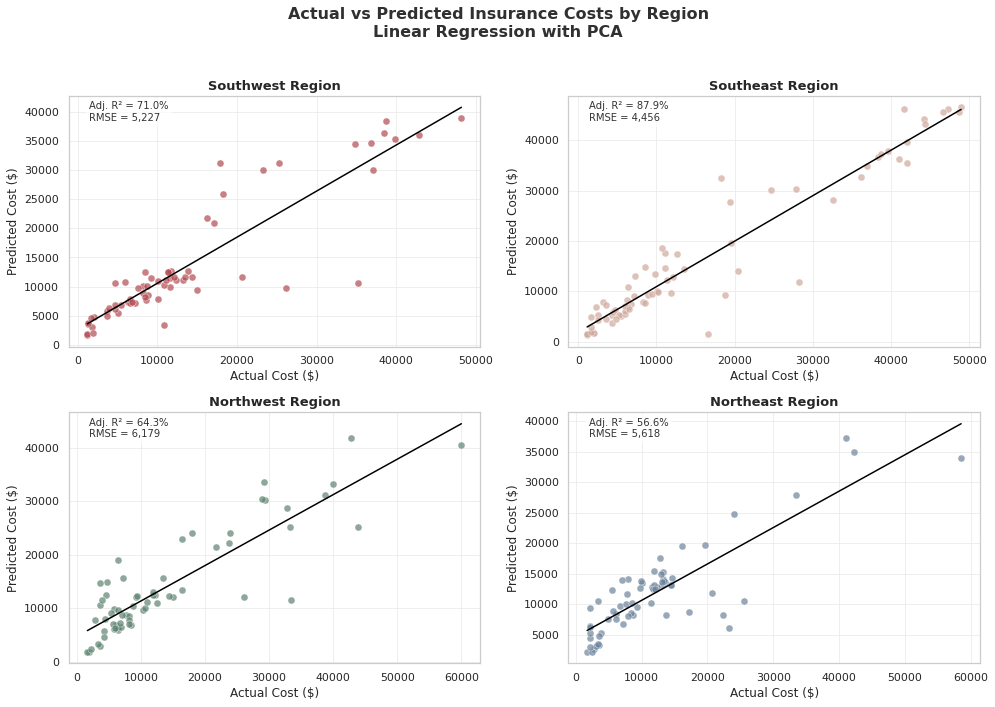

In [165]:
# Prepare data
for i in range(4):
    actuals[i].loc[:, 'region'] = regions[i]
    
actual = pd.concat([actuals[i] for i in range(4)], axis=0)
pred = pd.concat([preds[i] for i in range(4)], axis=0)
df = pd.concat([actual, pred], axis=1).reset_index(drop=True)
df.columns = ['index', 'actuals', 'region', 'preds']

# Define colors per region
colors = ["#B14B51", '#D0A99C', '#5D8370', '#6C839B']

# Set up figure — 2x2 grid (like facet_col_wrap=2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Scatter + trendline per region
for idx, region in enumerate(regions):
    ax = axes[idx]
    region_data = df[df['region'] == region]
    
    # Scatter plot
    sns.scatterplot(
        data=region_data,
        x='actuals',
        y='preds',
        color=colors[idx],
        alpha=0.7,
        s=50,
        edgecolor='white',
        ax=ax
    )
    
    # Trendline (OLS)
    lr = LinearRegression()
    X = region_data['actuals'].values.reshape(-1, 1)
    y = region_data['preds'].values
    lr.fit(X, y)
    y_pred_line = lr.predict(X)
    sns.lineplot(x=region_data['actuals'], y=y_pred_line, color='black', linewidth=1.5, ax=ax)
    
    # Titles & labels
    ax.set_title(f"{region} Region", fontsize=13, weight='bold')
    ax.set_xlabel("Actual Cost ($)")
    ax.set_ylabel("Predicted Cost ($)")
    
    # Add annotations for RMSE & Adj R²
    ax.text(
        0.05, 0.90,
        f"Adj. R² = {adj_r2_scores[idx]*100:.1f}%\nRMSE = {rmses[idx]:,.0f}",
        transform=ax.transAxes,
        fontsize=10,
        color='#333333',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
    )
    
    # Grid style
    ax.grid(True, which='major', linewidth=0.8, color='#EAEAEA')
    ax.set_facecolor('white')

# Global title
fig.suptitle("Actual vs Predicted Insurance Costs by Region\nLinear Regression with PCA", 
             fontsize=16, color="#303030", weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [166]:
mod_res.iloc[1,0]=pd.Series(rmses).mean()
mod_res.iloc[1,1]=pd.Series(adj_r2_scores).mean()
display(mod_res.iloc[:2,].sort_values("Average RMSE"))

,Average RMSE,Avg. Adjusted R2
KNN,5370.0125,0.699643
Linear Regression,5646.52,0.741028
